## 1. Data Collection 

### 1.1. Import Ncessary Library

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2. Load the Dataset

In [2]:
# Load the dataset
file_path = '../data/cleaned_insurance_data.csv'
df = pd.read_csv(file_path, sep='|')

C:\Users\getac\AppData\Local\Temp\ipykernel_18368\2673781997.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


In [3]:
# Display basic information
print("Data Overview")
df.head()

Data Overview


UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen    Windscreen   
1  Current account  ...             Mobility - Windscreen    Windscreen   
2  Current account  ...             Mobility - Windscreen    Windscreen   
3  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   
4  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   

    CoverType            CoverGroup              Section  \
0  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
1  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
2  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
3  Own Damage  Comprehensive - Taxi  Motor Comprehensive   
4  Own Damage  Comprehensive - Taxi  Motor Comprehensive   

                           Product StatutoryClass StatutoryRiskType  \
0  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
1  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
2  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
3  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
4  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   

   TotalPremium TotalClaims  
0     21.929825         0.0  
1     21.929825         0.0  
2      0.000000         0.0  
3    512.848070         0.0  
4      0.000000         0.0  

[5 rows x 52 columns]

## 2. Explanatory Data Analysis (EDA)

In [4]:
df.shape

(1000098, 52)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      959866 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [7]:
for column in df.columns:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print()  


Unique values for column 'UnderwrittenCoverID':
[145249 145255 145247 ... 265173 265181  16093]

Unique values for column 'PolicyID':
[12827 10874 10173 ... 22498   807 22854]

Unique values for column 'TransactionMonth':
['2015-03-01 00:00:00' '2015-05-01 00:00:00' '2015-07-01 00:00:00'
 '2015-01-01 00:00:00' '2015-04-01 00:00:00' '2015-06-01 00:00:00'
 '2015-08-01 00:00:00' '2015-02-01 00:00:00' '2014-12-01 00:00:00'
 '2014-11-01 00:00:00' '2014-10-01 00:00:00' '2014-09-01 00:00:00'
 '2014-07-01 00:00:00' '2014-08-01 00:00:00' '2014-03-01 00:00:00'
 '2014-05-01 00:00:00' '2014-04-01 00:00:00' '2014-06-01 00:00:00'
 '2014-02-01 00:00:00' '2013-12-01 00:00:00' '2013-11-01 00:00:00'
 '2014-01-01 00:00:00' '2013-10-01 00:00:00']

Unique values for column 'IsVATRegistered':
[ True False]

Unique values for column 'Citizenship':
['  ' 'AF' 'ZA' 'ZW']

Unique values for column 'LegalType':
['Close Corporation' 'Individual' 'Partnership' 'Private company'
 'Public company' 'Sole proprieter']

In [8]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [9]:
df.describe()

UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.000000   
25%        2.008000e+03       4.000000    2237.000000      75.000000   
50%        2.011000e+03       4.000000    2694.000000     111.000000   
75%        2.013000e+03       4.000000    2694.000000     111.000000   
max        2.015000e+03      10.000000   12880.000000     309.000000   

       NumberOfDoors  CustomValueEstimate  NumberOfVehiclesInFleet  \
count  999546.000000         2.204560e+05                      0.0   
mean        4.019250         2.255311e+05                      NaN   
std         0.468314         5.645157e+05                      NaN   
min         0.000000         2.000000e+04                      NaN   
25%         4.000000         1.350000e+05                      NaN   
50%         4.000000         2.200000e+05                      NaN   
75%         4.000000         2.800000e+05                      NaN   
max         6.000000         2.655000e+07                      NaN   

         SumInsured  CalculatedPremiumPerTerm  TotalPremium   TotalClaims  
count  1.000098e+06              1.000098e+06  1.000098e+06  1.000098e+06  
mean   6.041727e+05              1.178757e+02  6.190550e+01  6.486119e+01  
std    1.508332e+06              3.997017e+02  2.302845e+02  2.384075e+03  
min    1.000000e-02              0.000000e+00 -7.825768e+02 -1.200241e+04  
25%    5.000000e+03              3.224800e+00  0.000000e+00  0.000000e+00  
50%    7.500000e+03              8.436900e+00  2.178333e+00  0.000000e+00  
75%    2.500000e+05              9.000000e+01  2.192982e+01  0.000000e+00  
max    1.263620e+07              7.442217e+04  6.528260e+04  3.930921e+05

In [10]:
# Check for missing values
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                          40232
AccountType                   40232
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

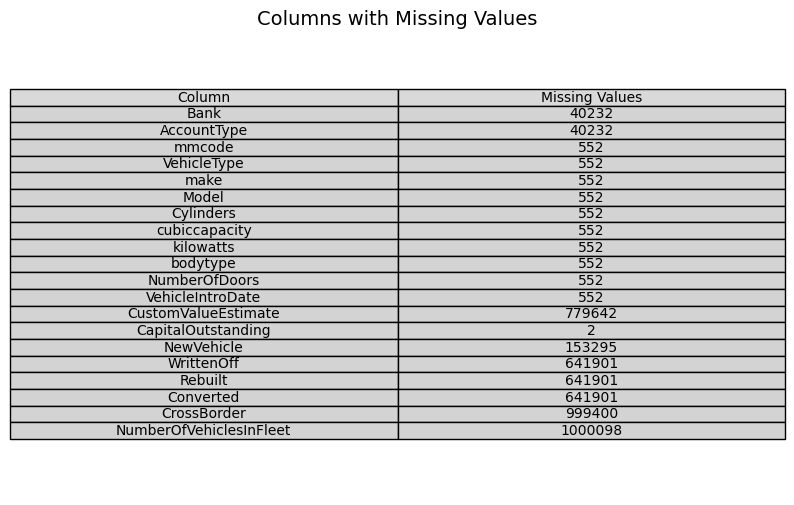

In [11]:
# Calculate the sum of missing values for each column
missing_counts = df.isnull().sum()

# Filter to get only columns with missing values
columns_with_missing = missing_counts[missing_counts > 0]

# Create a DataFrame for plotting
missing_values_df = pd.DataFrame({
    'Column': columns_with_missing.index,
    'Missing Values': columns_with_missing.values
})

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))  # Set the size of the plot
ax.axis('off')  # Hide the axes

# Create the table
table = ax.table(
    cellText=missing_values_df.values,
    colLabels=['Column', 'Missing Values'],
    cellLoc='center',
    loc='center',
    cellColours=[['lightgrey'] * 2] * len(missing_values_df),
    colColours=['#d9d9d9'] * 2
)

# Add a title
plt.title('Columns with Missing Values', fontsize=14)

# Display the table
plt.show()

<Axes: >

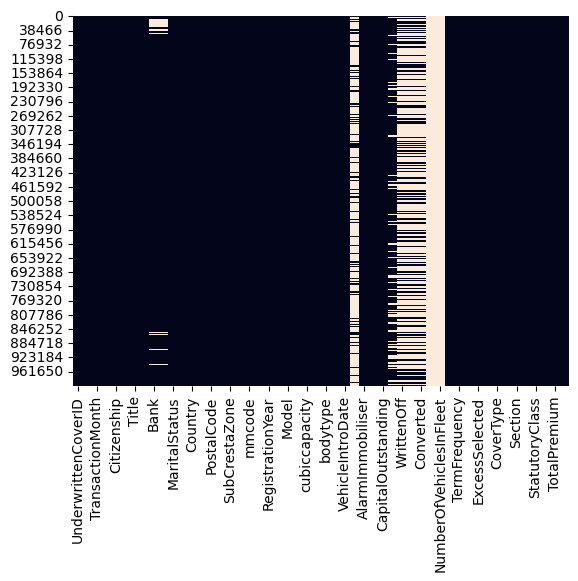

In [12]:
sns.heatmap(df.isnull(), cbar=False)

### 2.2. Univariate Analysis

#### a. Distribution of Variables

In [13]:
# Histograms for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [14]:
numerical_cols.isnull().sum()

0

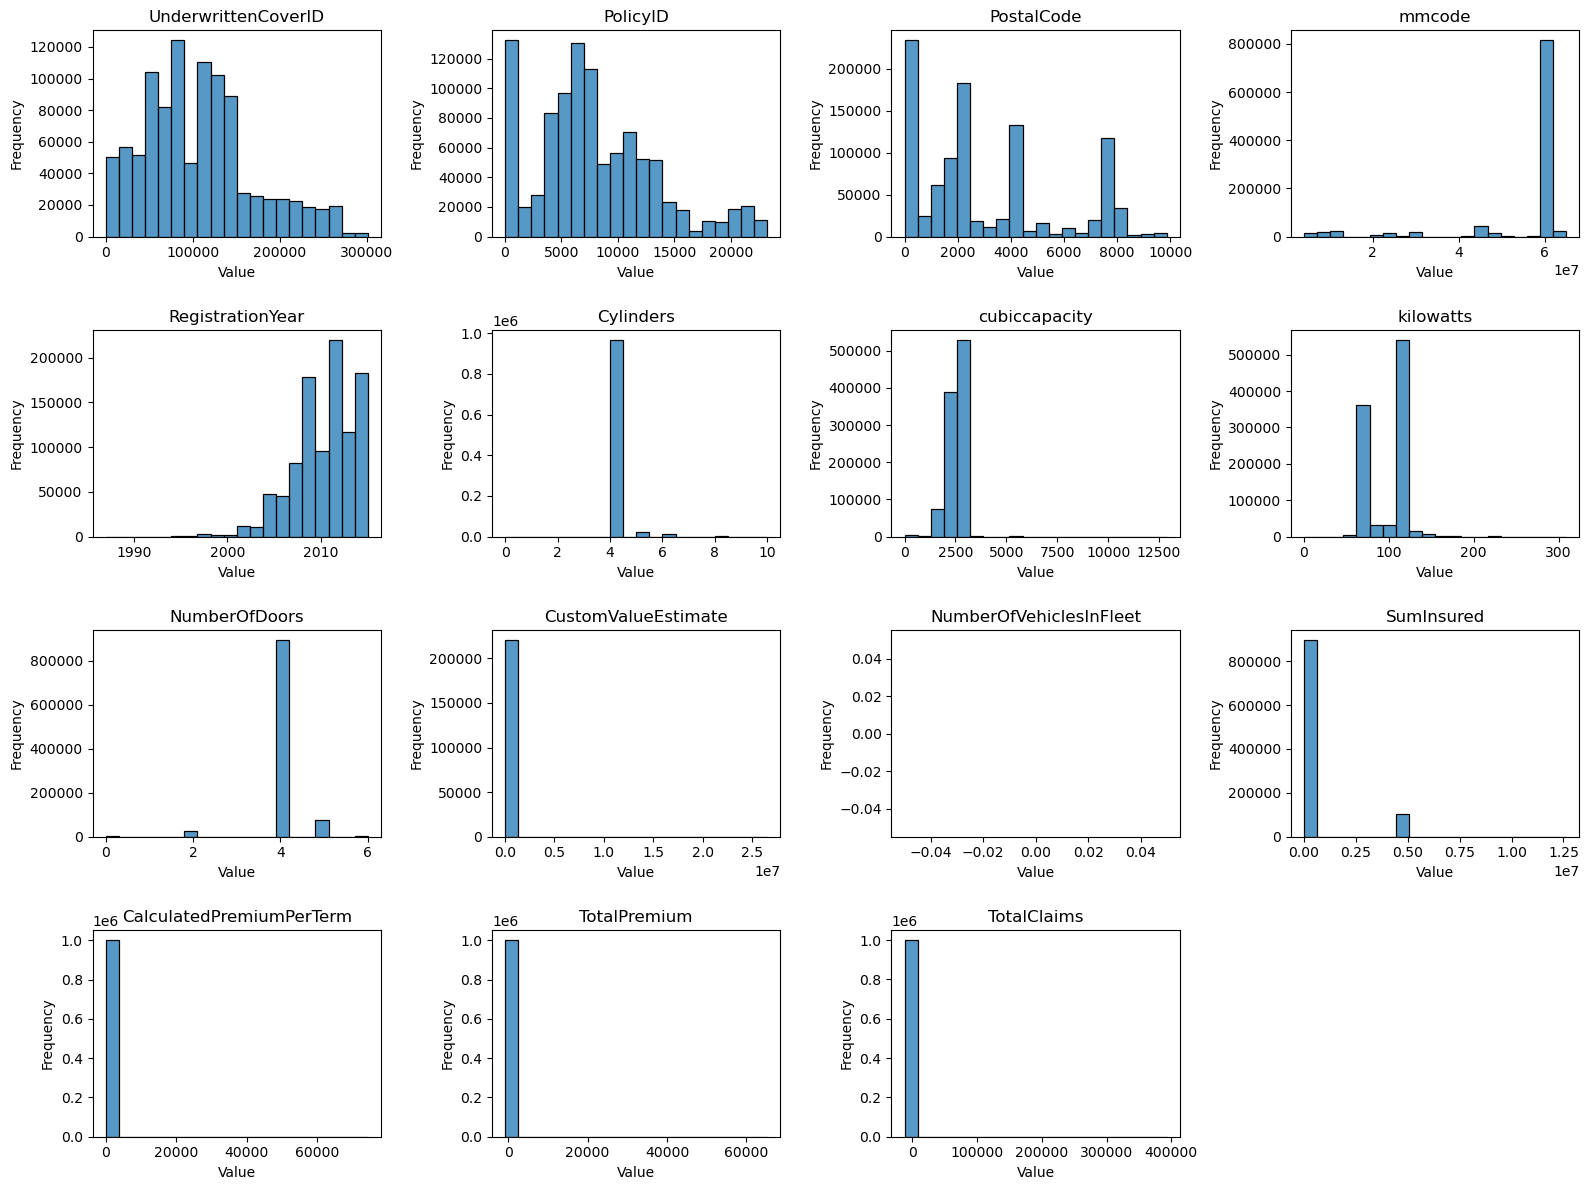

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust 4x4 to fit the number of numerical columns
    sns.histplot(df[col].dropna(), bins=20, kde=False)  # kde=True to add Kernel Density Estimate
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Categorical Columns

In [16]:
# Bar charts for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')

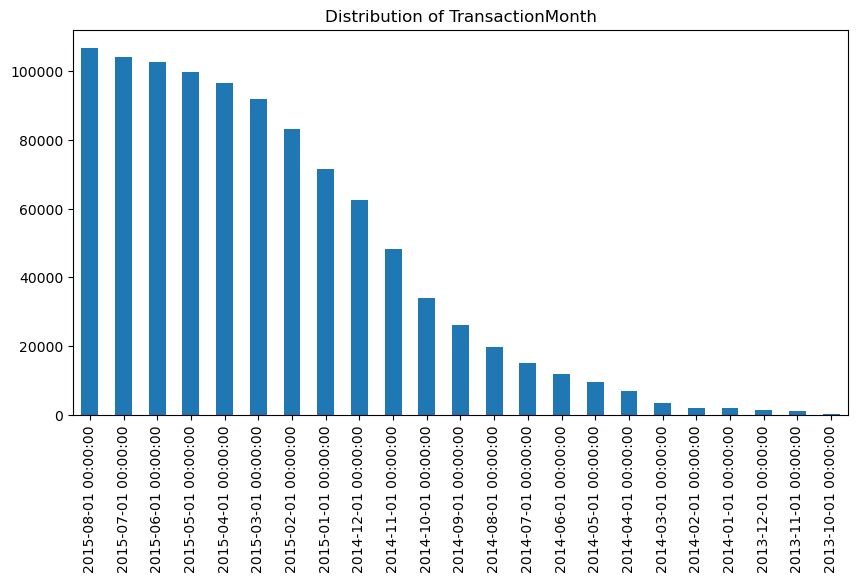

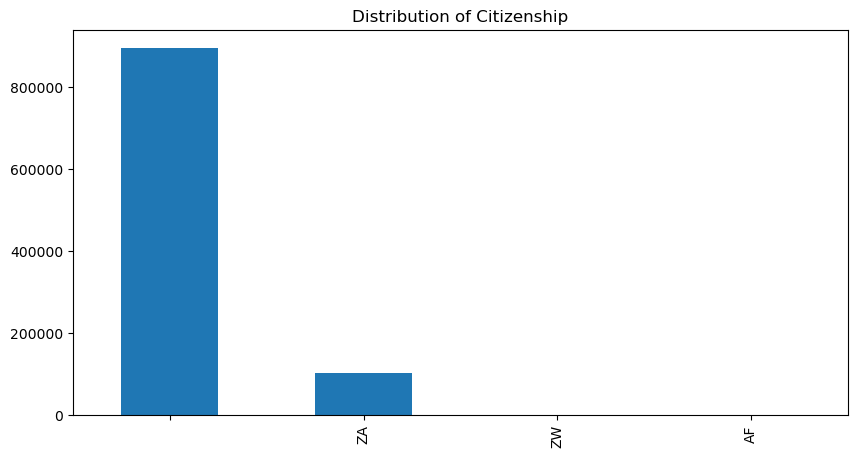

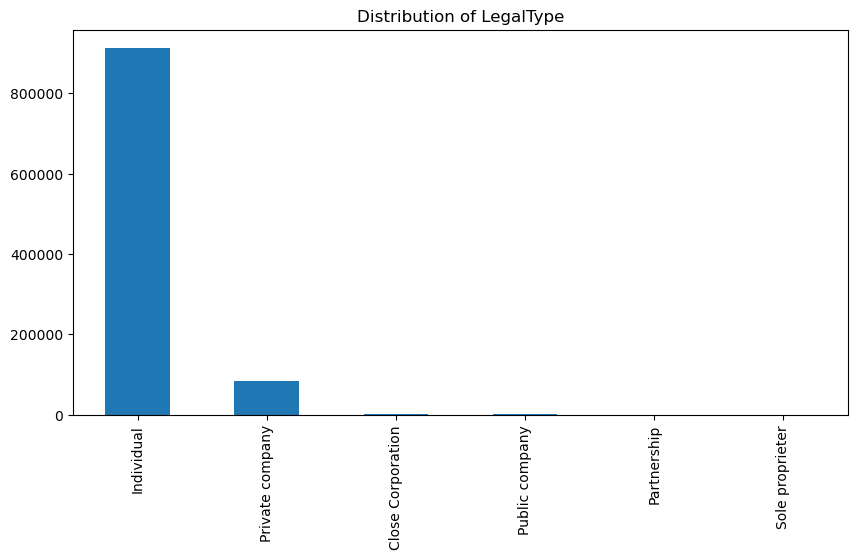

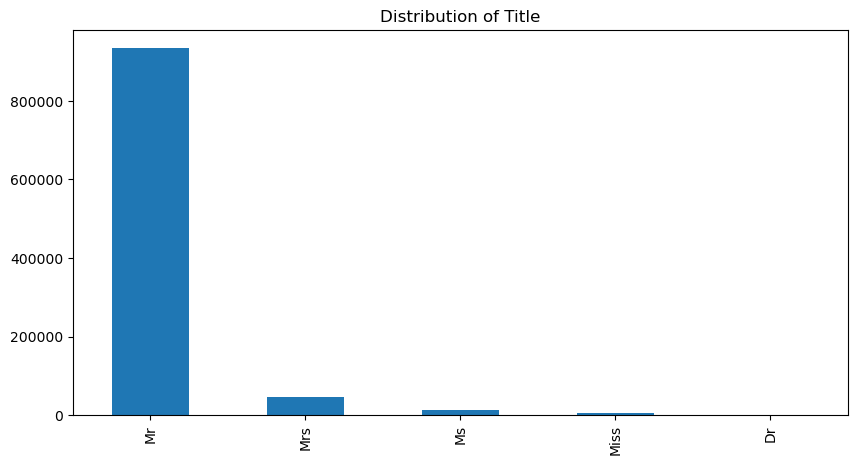

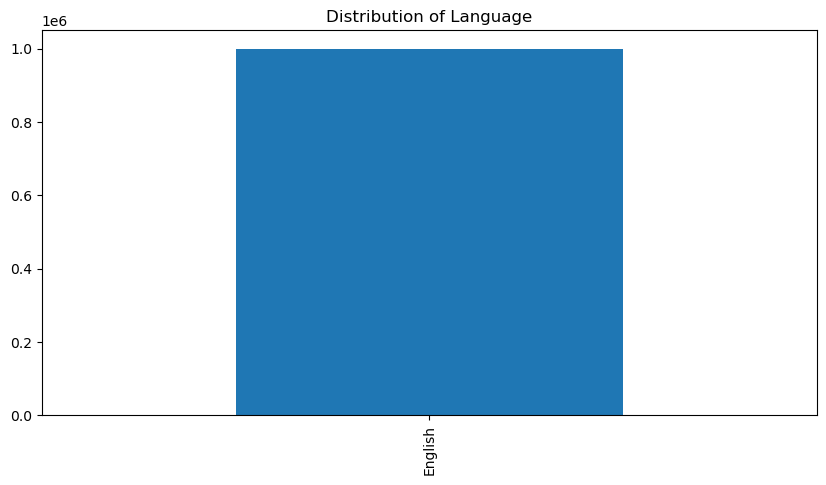

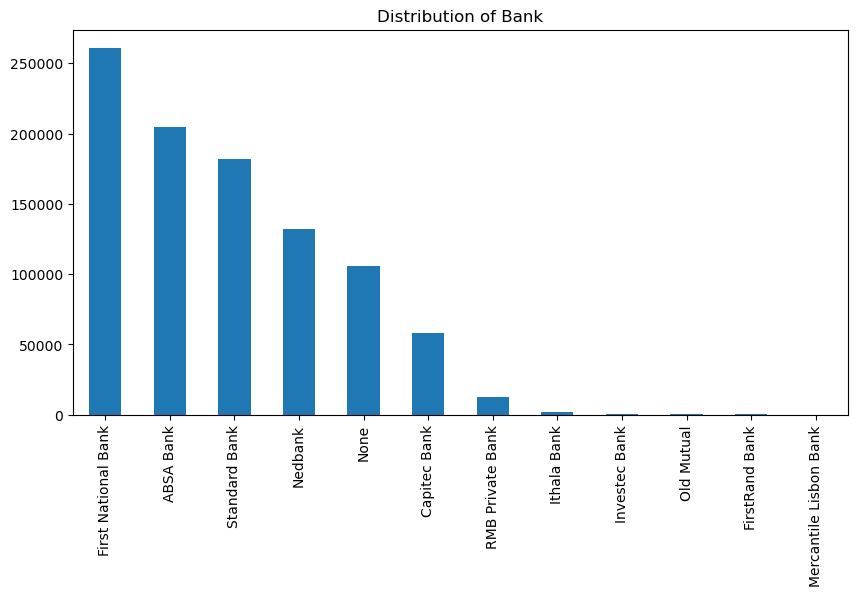

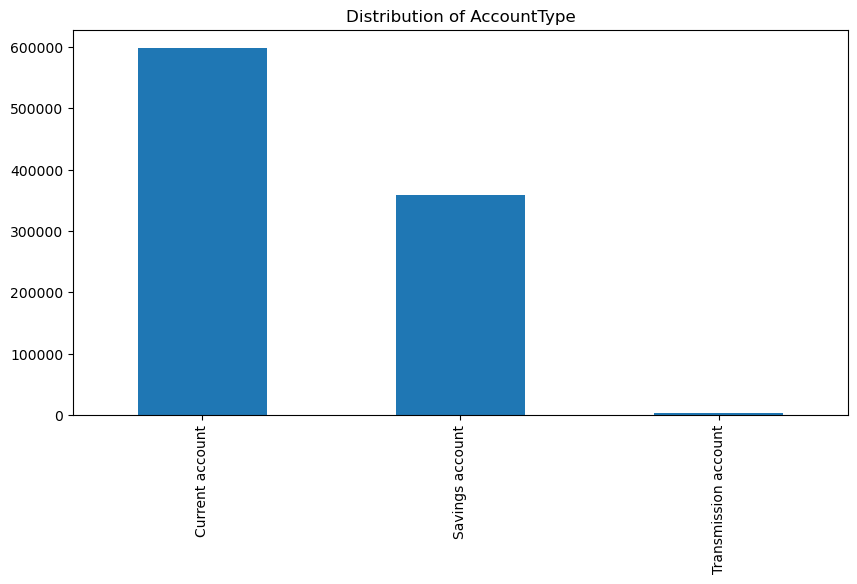

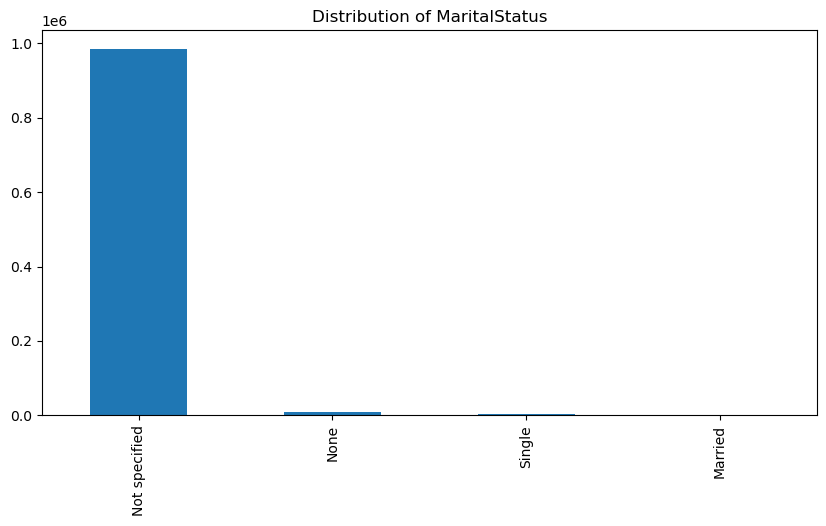

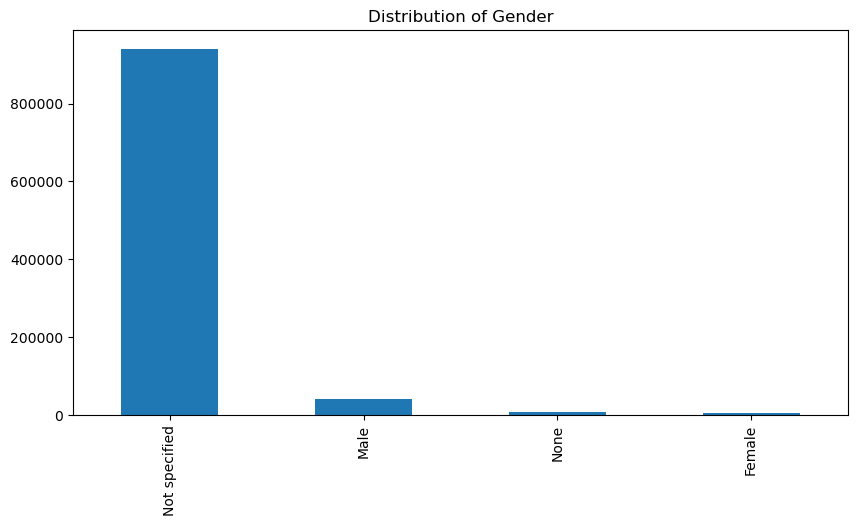

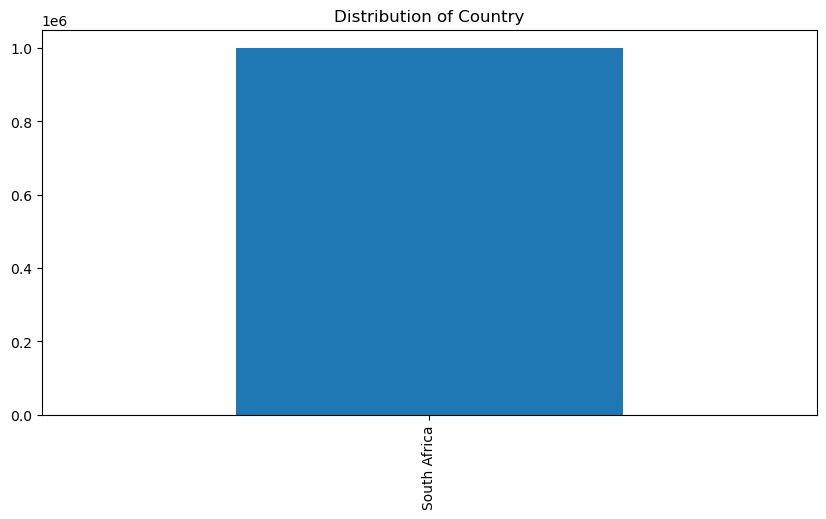

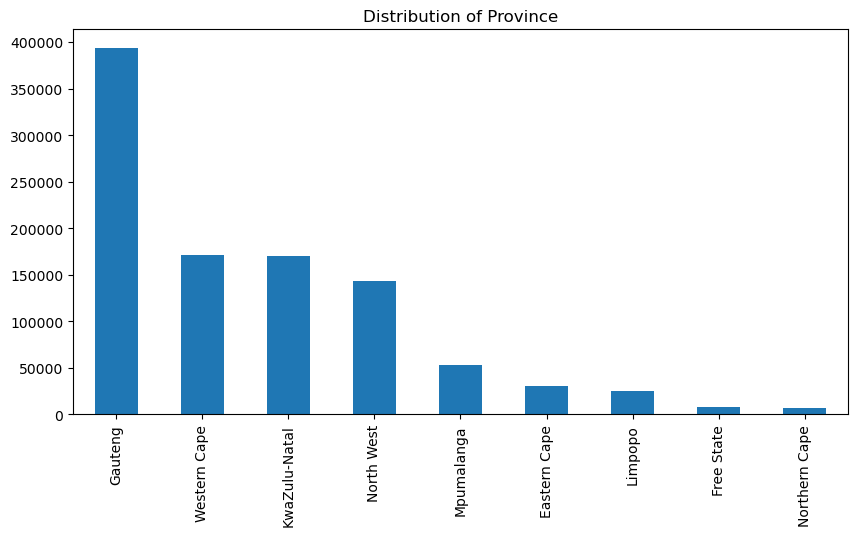

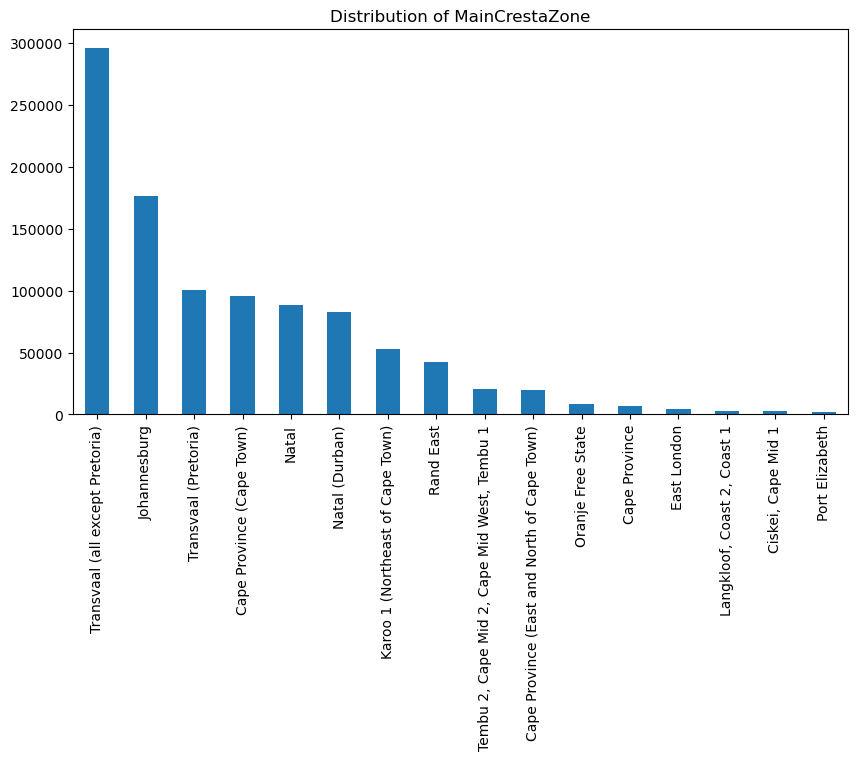

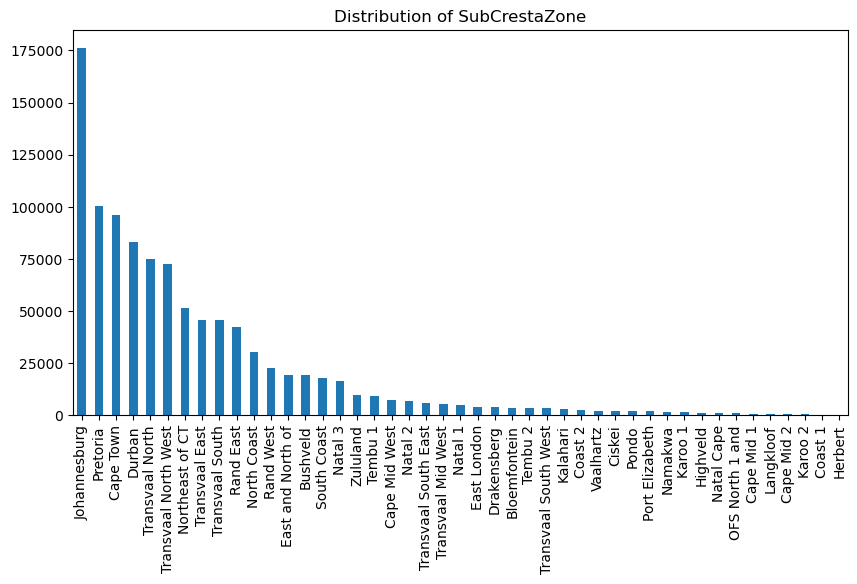

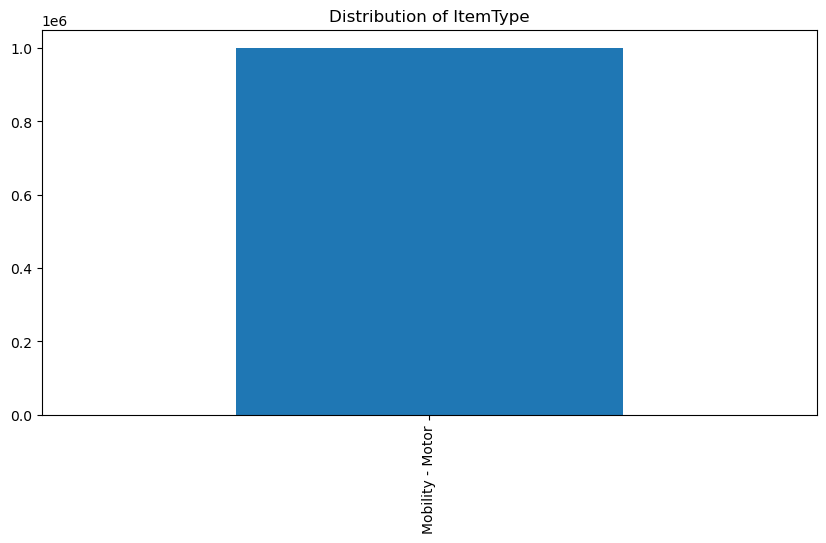

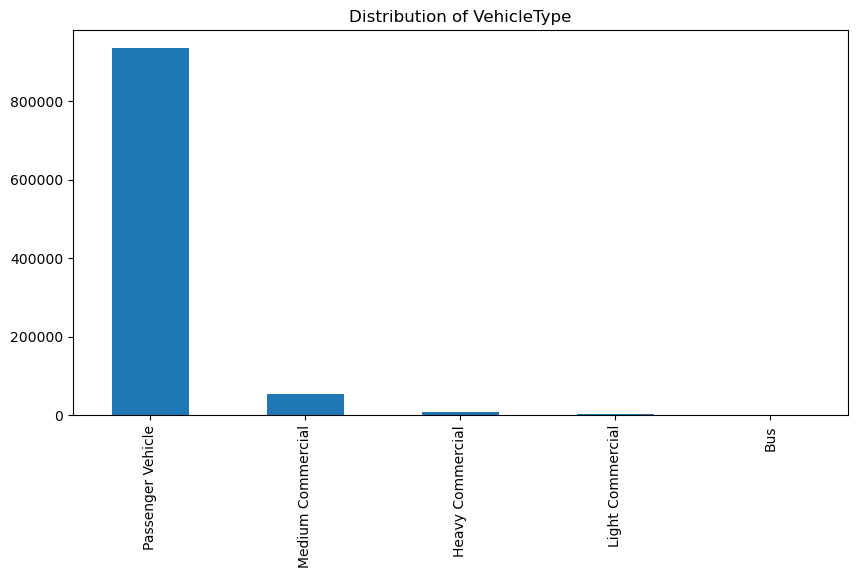

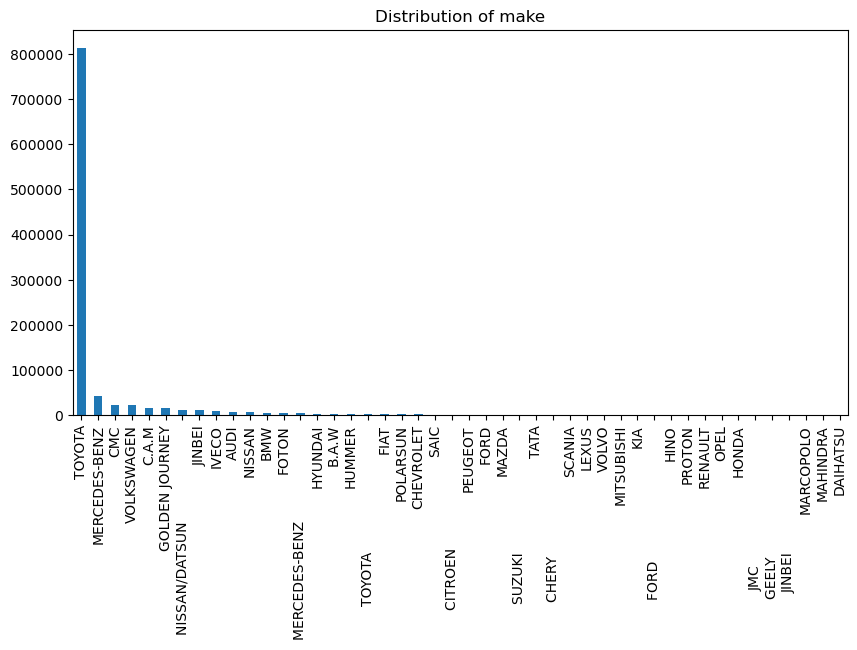

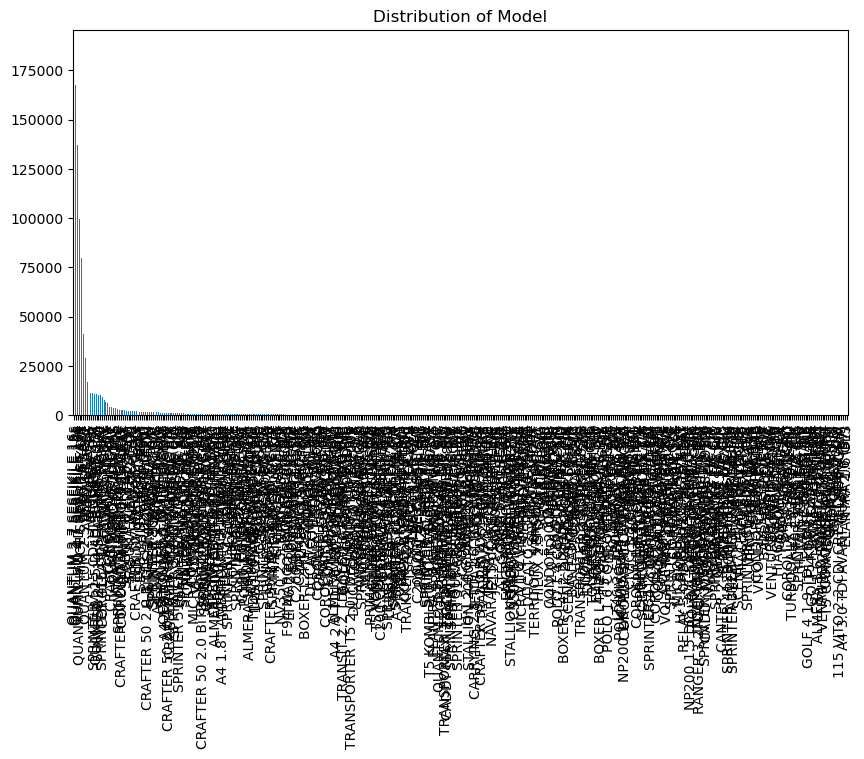

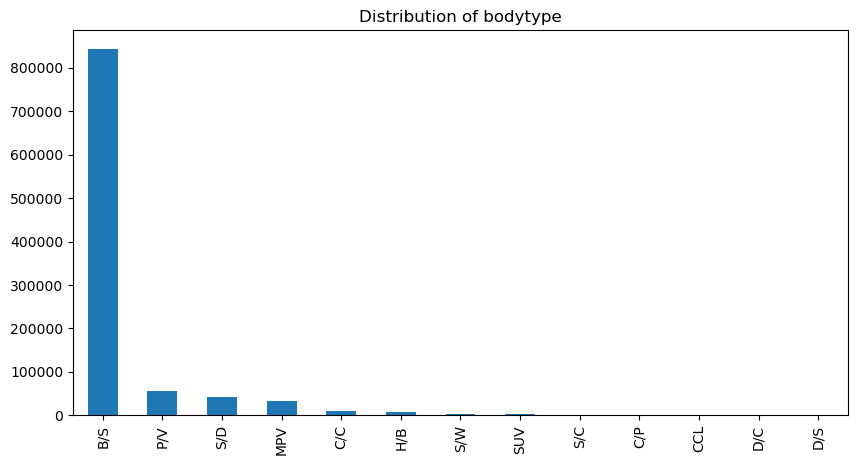

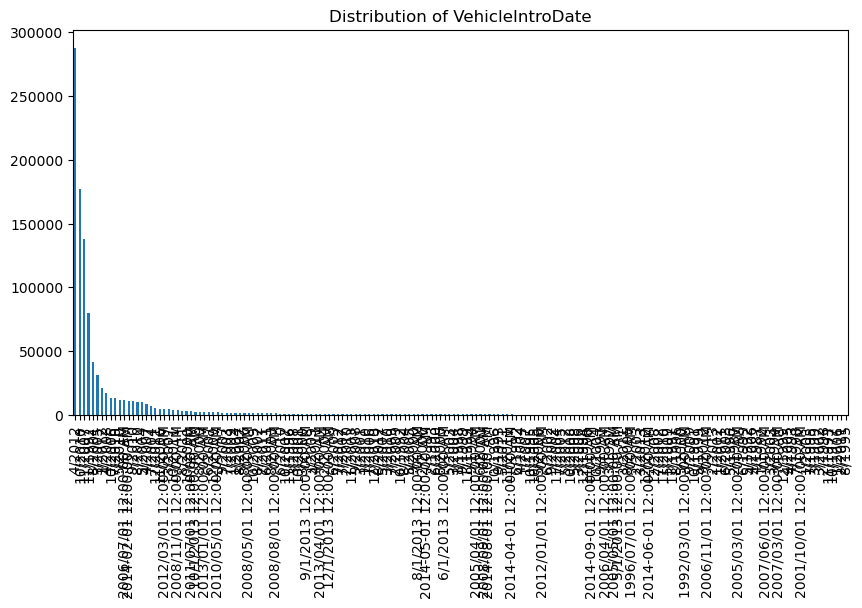

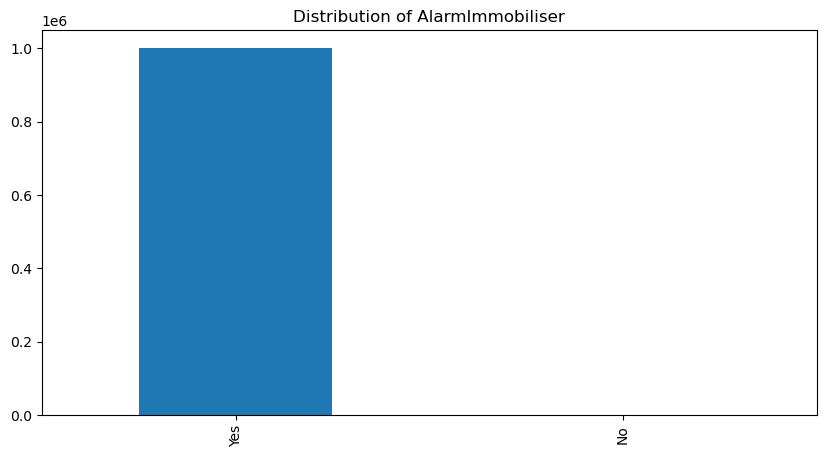

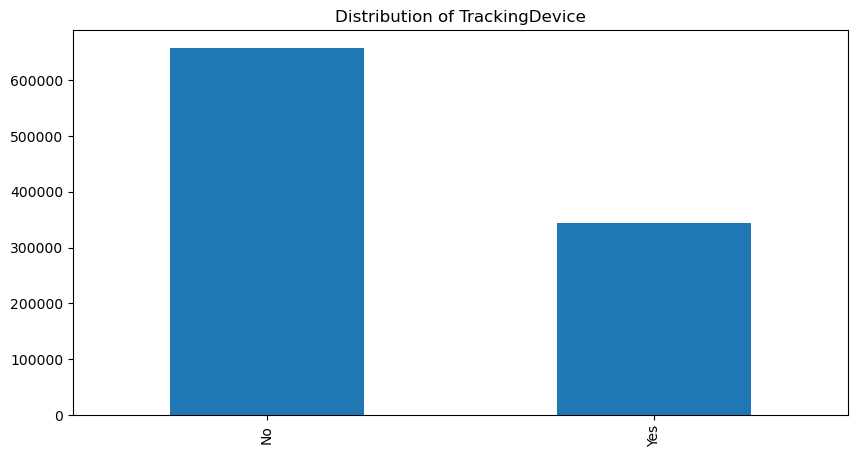

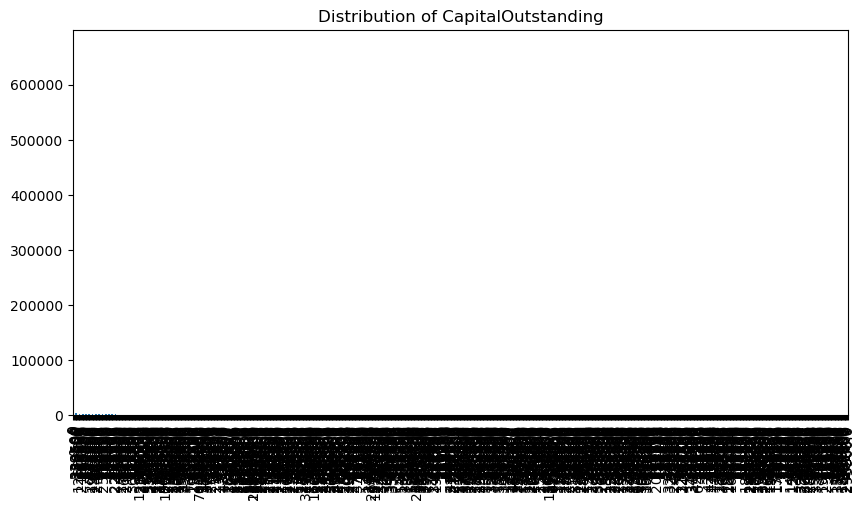

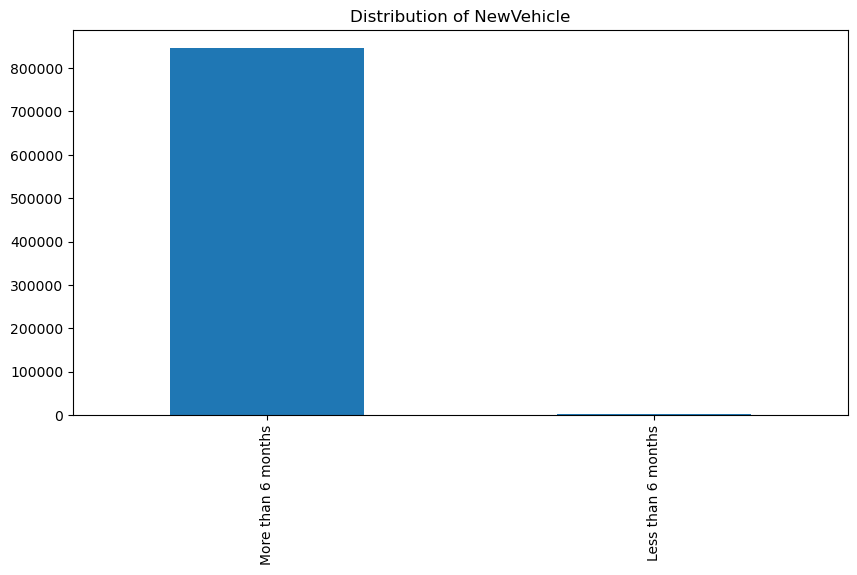

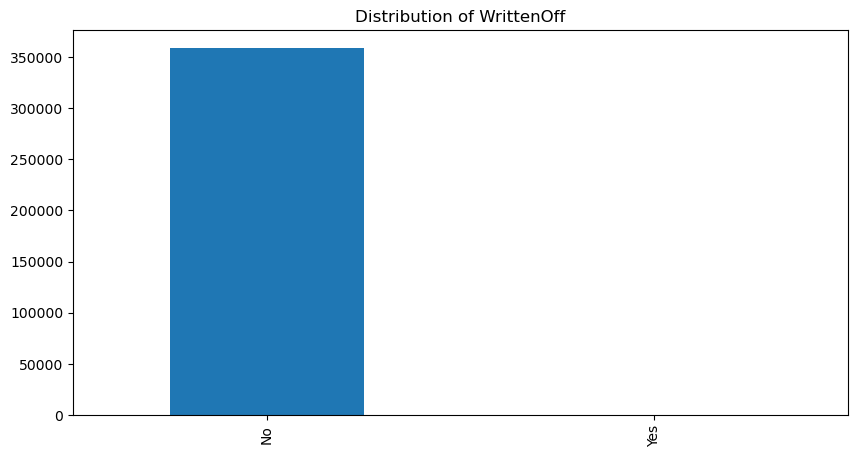

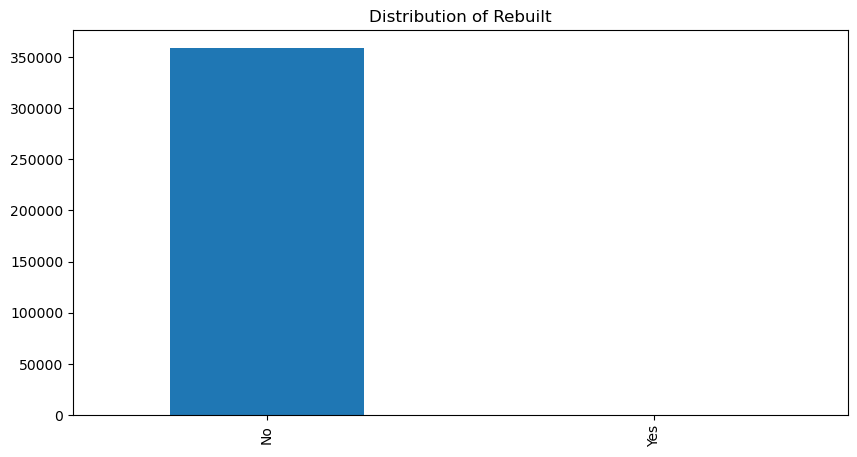

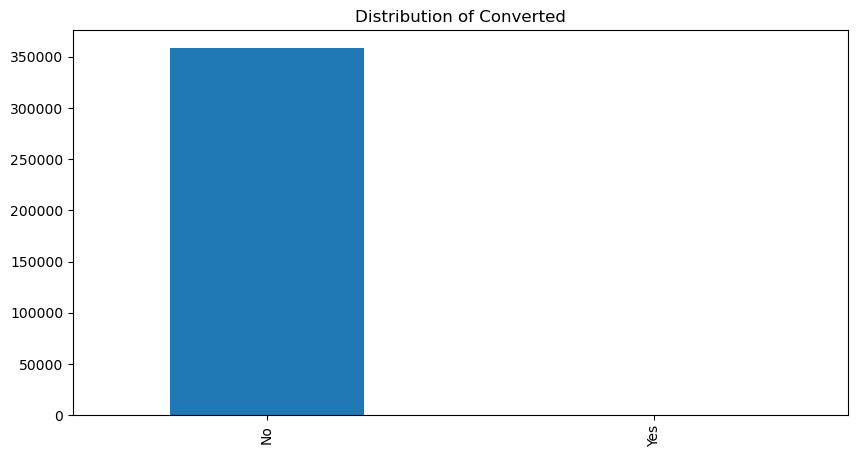

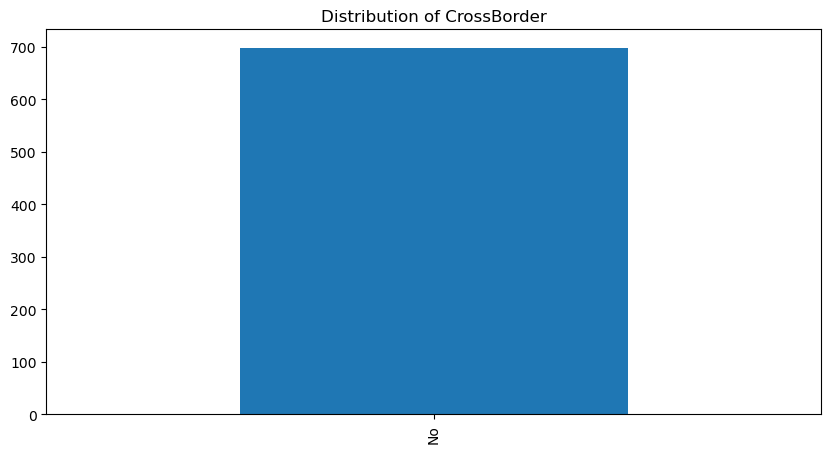

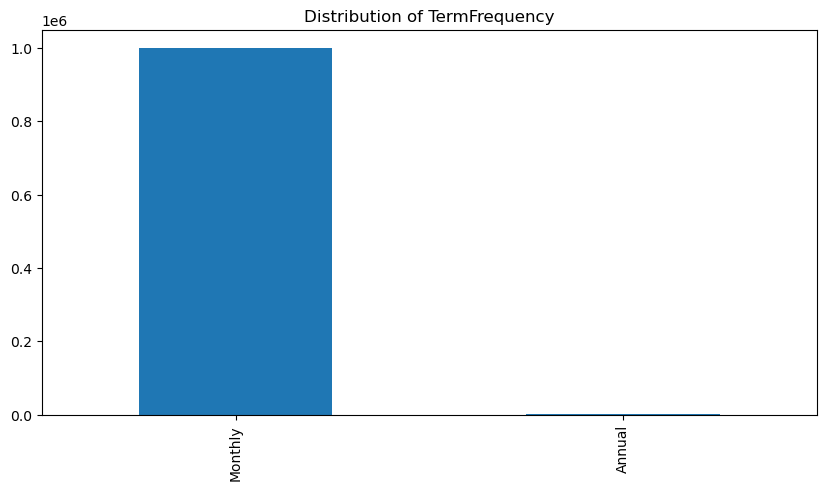

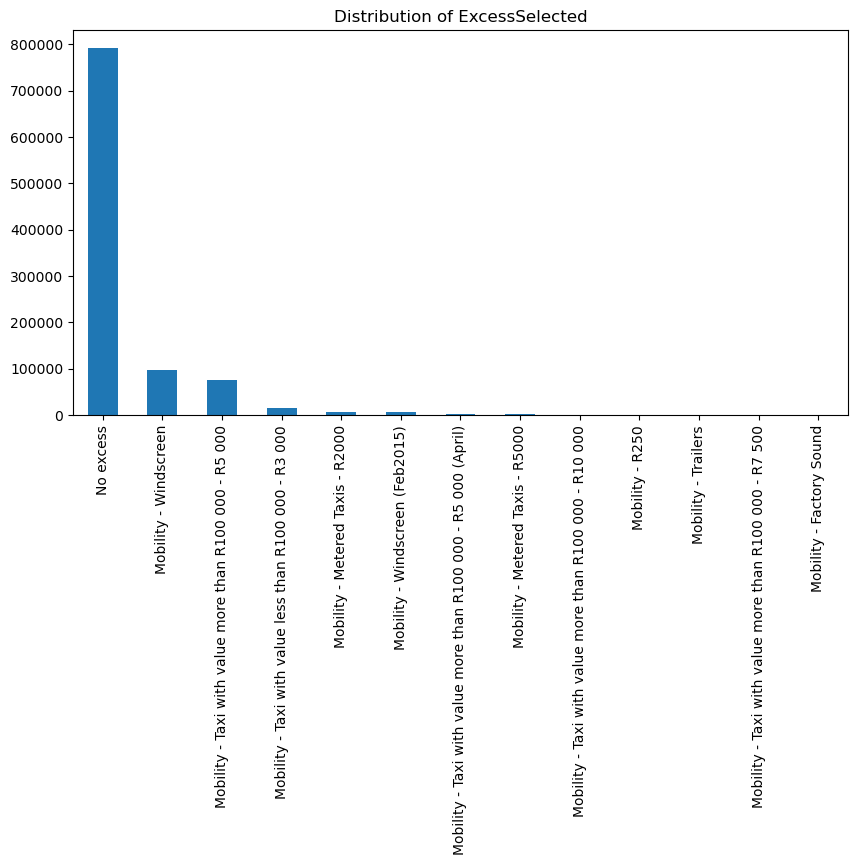

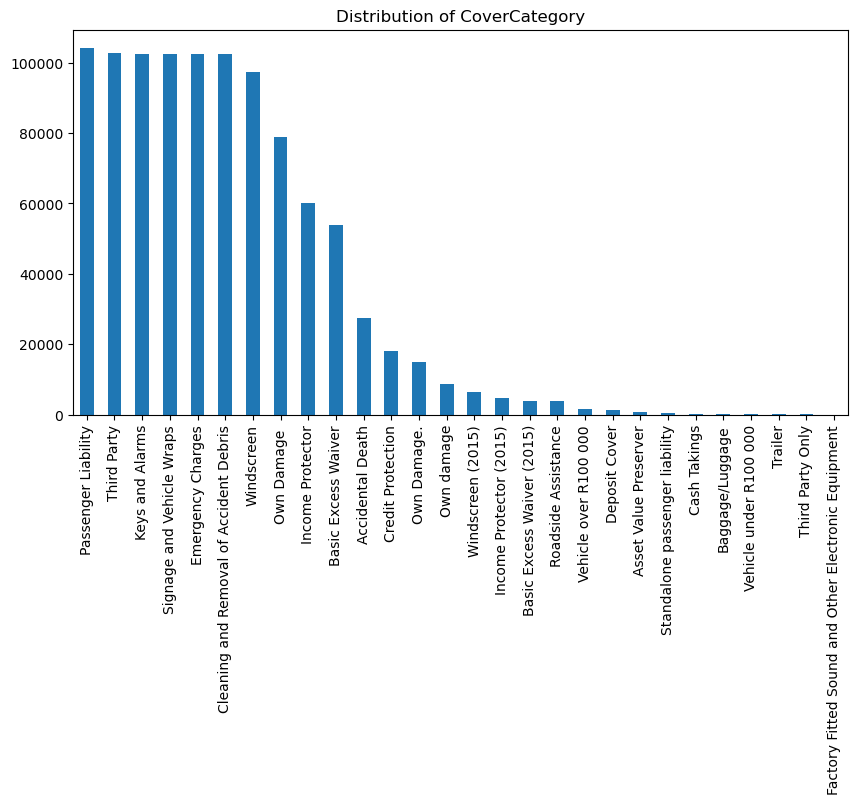

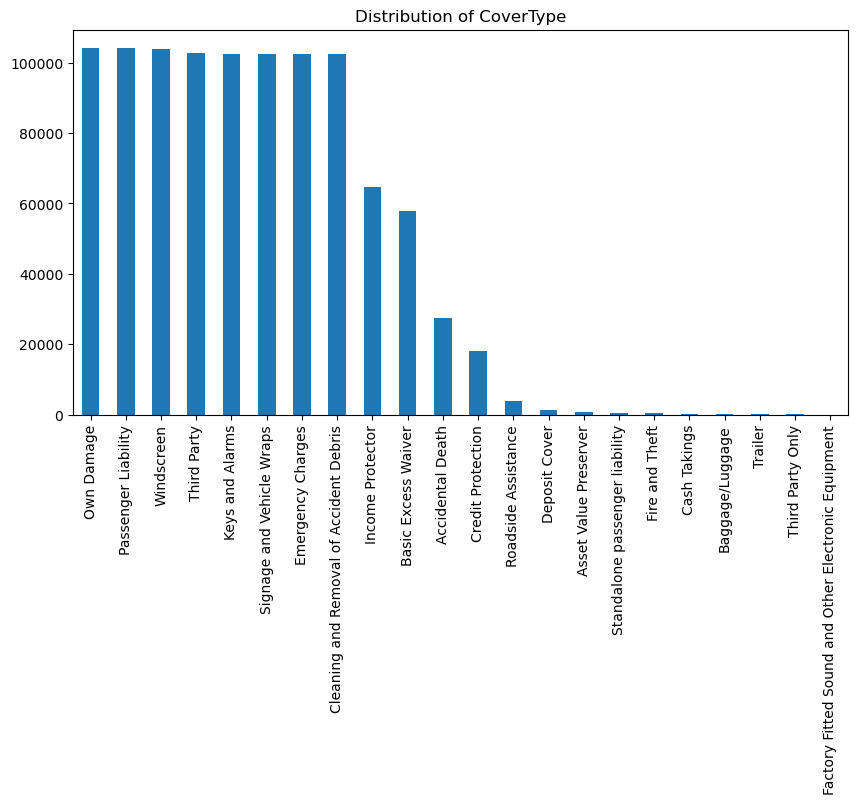

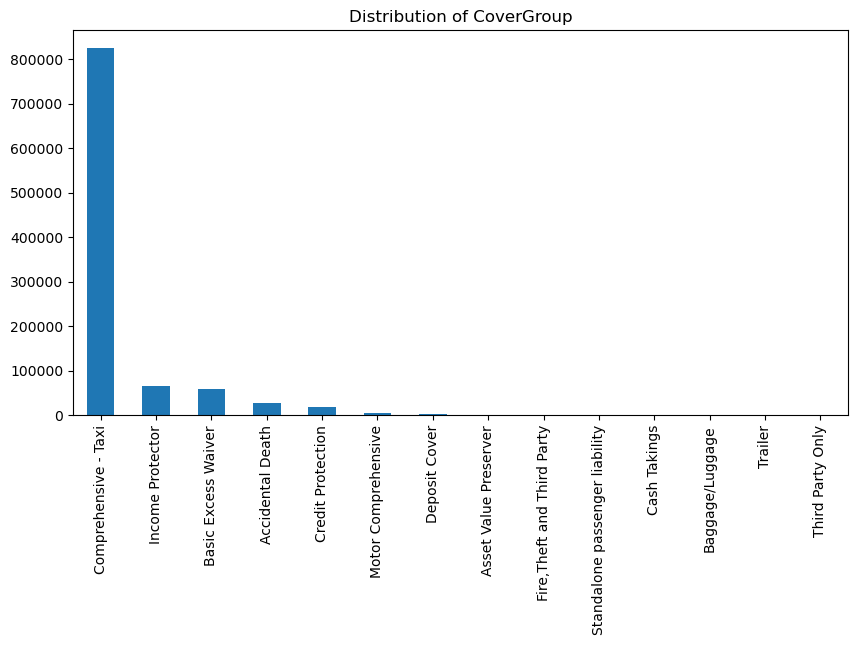

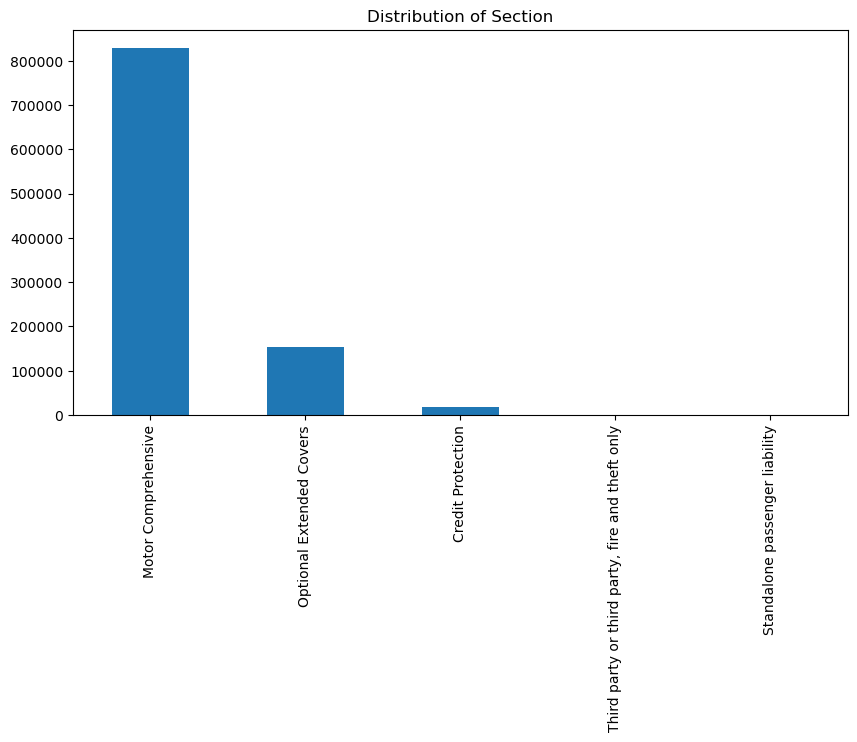

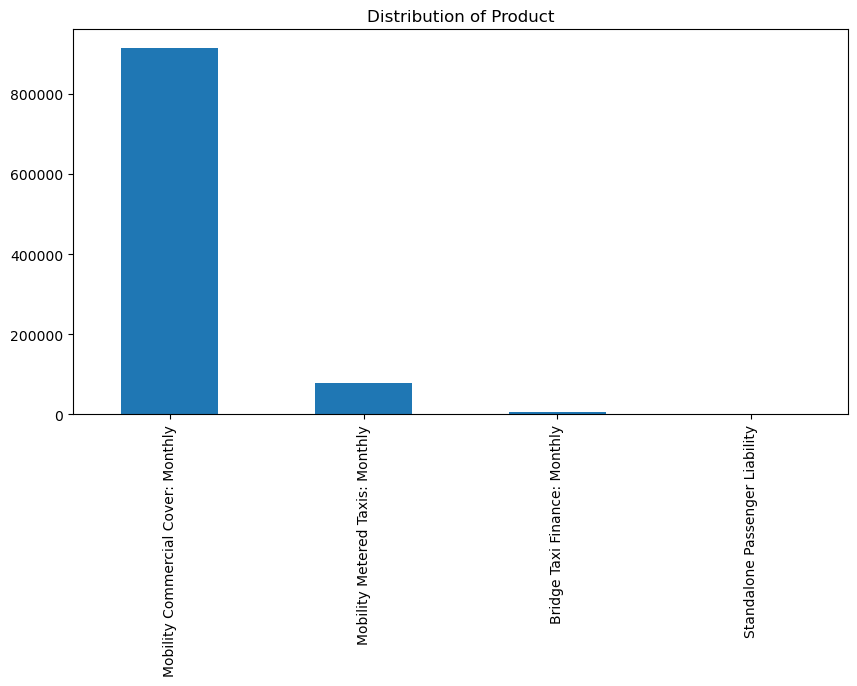

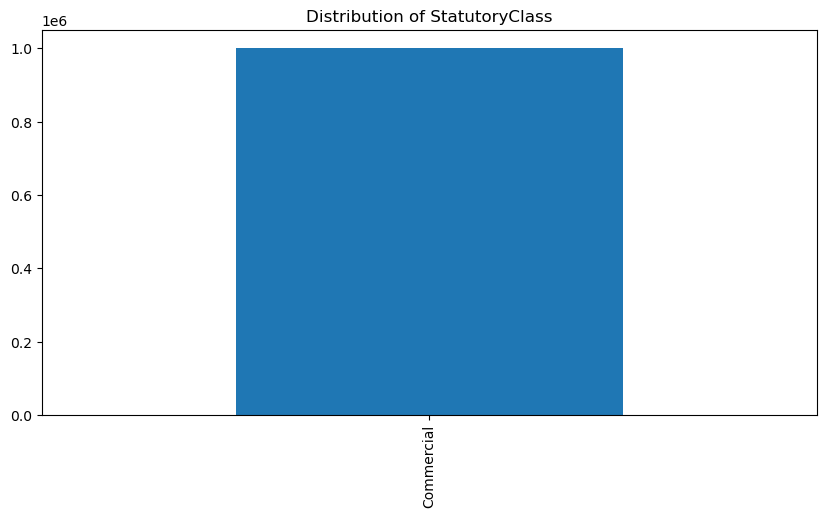

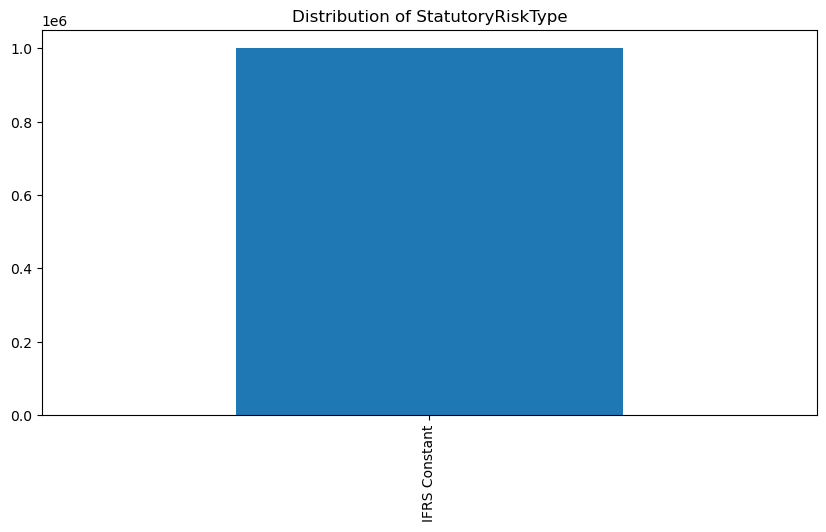

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot bar charts for categorical columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f'Distribution of {col}')
    plt.show()

### 2.2. Bivariate and Multivariate Analysis

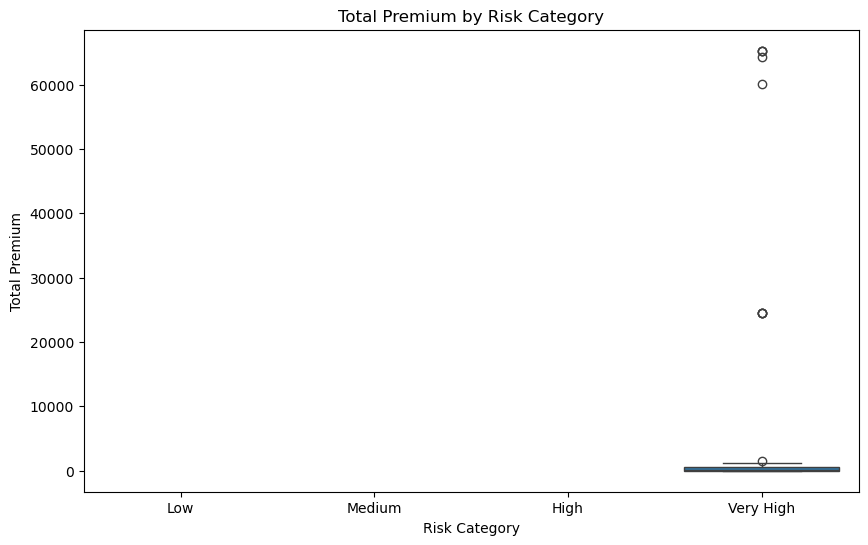

In [18]:
df['RiskCategory'] = pd.cut(df['TotalClaims'], bins=[0, 1, 5, 10, df['TotalClaims'].max()], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskCategory', y='TotalPremium', data=df)
plt.title('Total Premium by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Total Premium')
plt.show()


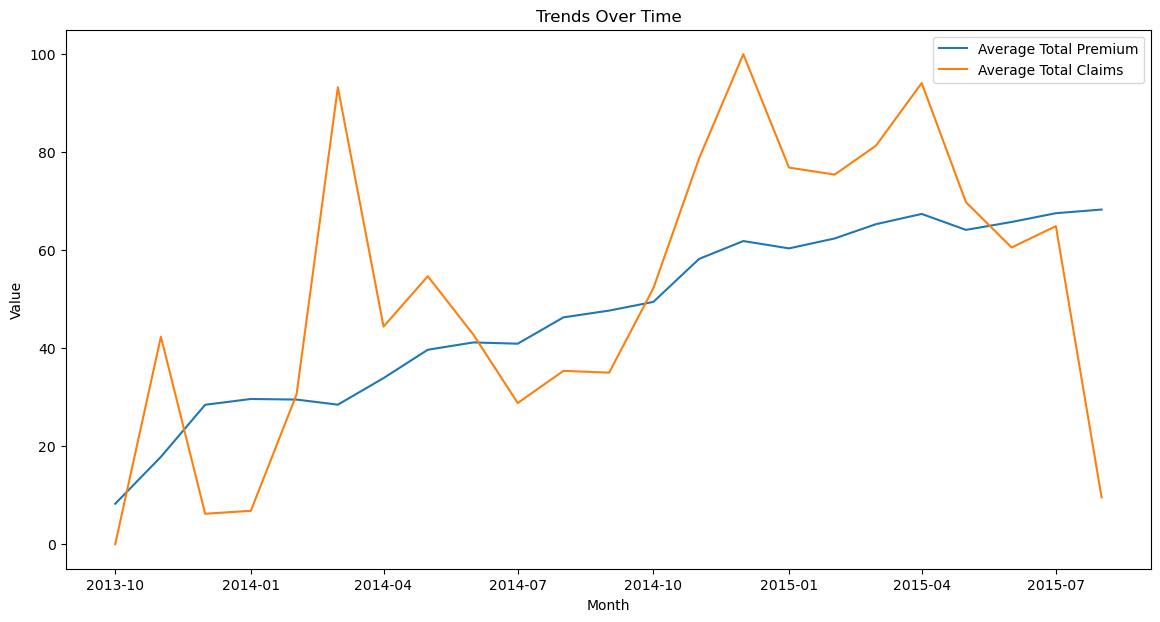

In [19]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m')
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('TransactionMonth')['TotalPremium'].mean(), label='Average Total Premium')
plt.plot(df.groupby('TransactionMonth')['TotalClaims'].mean(), label='Average Total Claims')
plt.title('Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

Correlations and Associations

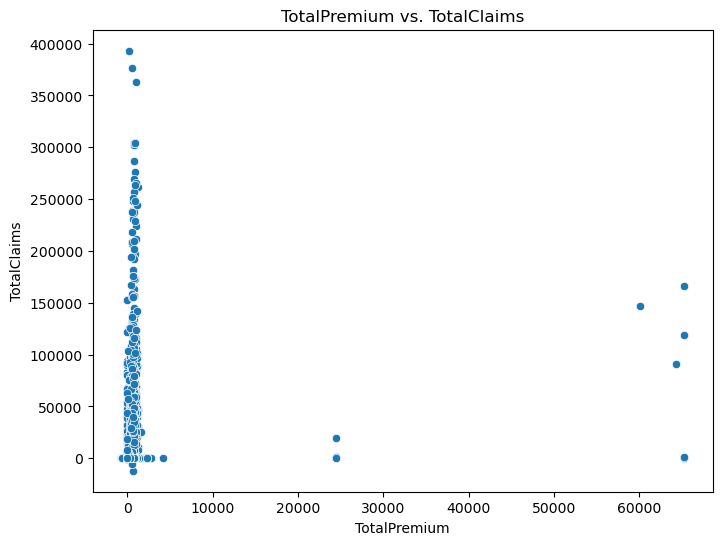

In [20]:
# Scatter plot of TotalPremium vs. TotalClaims
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims')
plt.title('TotalPremium vs. TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.show()

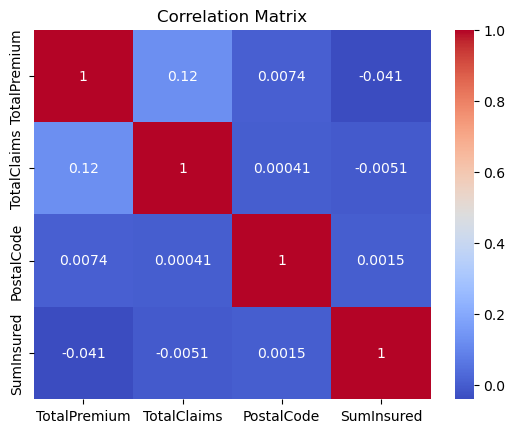

In [21]:
# Correlation matrix
correlation_matrix = df[['TotalPremium', 'TotalClaims', 'PostalCode', 'SumInsured']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Preprocessing

3.1 Data Comparison

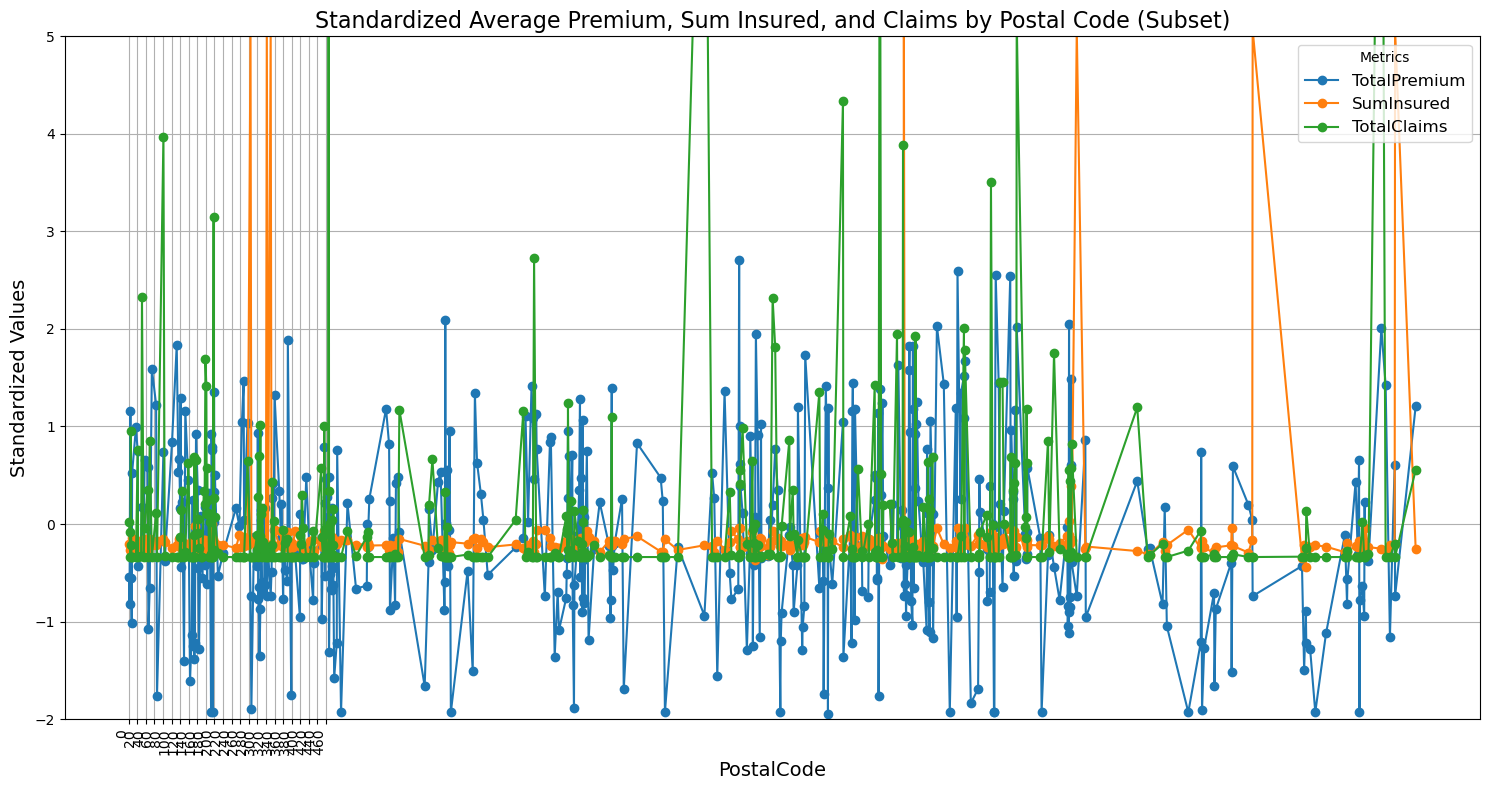

In [22]:
postalcode_summary = df.groupby('PostalCode').agg({
    'TotalPremium': 'mean',
    'SumInsured': 'mean',
    'TotalClaims': 'mean'
})

postalcode_summary_scaled = (postalcode_summary - postalcode_summary.mean()) / postalcode_summary.std()

# Set a focused x-axis range (e.g., focusing on PostalCodes between 0 and 3000)
postalcode_subset = postalcode_summary_scaled[(postalcode_summary_scaled.index >= 0) & (postalcode_summary_scaled.index <= 3000)]

plt.figure(figsize=(15, 8))

# Plot each metric for the subset of PostalCodes
for column in postalcode_subset.columns:
    plt.plot(postalcode_subset.index, postalcode_subset[column], marker='o', label=column)

# Rotate x-axis labels to prevent overlap
plt.xticks(np.arange(0, len(postalcode_subset.index), step=20), rotation=90, ha='right')

# Set title, labels, and legend
plt.title('Standardized Average Premium, Sum Insured, and Claims by Postal Code (Subset)', fontsize=16)
plt.xlabel('PostalCode', fontsize=14)
plt.ylabel('Standardized Values', fontsize=14)
plt.legend(title='Metrics', fontsize=12)

# Set a y-axis range to clip outliers and improve visualization
plt.ylim(-2, 5)

# Add grid
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

3.2. Data Cleaning

In [23]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values and percentages into a single DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Filter out columns with missing values only
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Display the missing values and their percentage
print(missing_data.sort_values(by='Percentage', ascending=False))


                         Missing Values  Percentage
NumberOfVehiclesInFleet         1000098  100.000000
CrossBorder                      999400   99.930207
RiskCategory                     997310   99.721227
CustomValueEstimate              779642   77.956560
Converted                        641901   64.183810
Rebuilt                          641901   64.183810
WrittenOff                       641901   64.183810
NewVehicle                       153295   15.327998
AccountType                       40232    4.022806
Bank                              40232    4.022806
bodytype                            552    0.055195
VehicleIntroDate                    552    0.055195
kilowatts                           552    0.055195
cubiccapacity                       552    0.055195
Cylinders                           552    0.055195
Model                               552    0.055195
make                                552    0.055195
VehicleType                         552    0.055195
mmcode      

3.2.1 Handling Missing Values

In [24]:
# Drop columns with very high missing values (over 50%)
cols_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate', 
                'Converted', 'Rebuilt', 'WrittenOff']
df = df.drop(columns=cols_to_drop)

# Impute missing values for categorical columns with the mode
categorical_cols = ['NewVehicle', 'AccountType', 'Bank', 'VehicleType', 
                    'make', 'Model', 'mmcode', 'bodytype']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with the mean
numerical_cols = ['cubiccapacity', 'kilowatts', 'Cylinders', 'NumberOfDoors']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Drop rows with missing values in the 'CapitalOutstanding' column
df.dropna(subset=['CapitalOutstanding'], inplace=True)

# Verify if there are any remaining missing values
print(df.isnull().sum())


UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                             0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
NumberOfDoors                    0
VehicleIntroDate    

3.2.2 Removing Redundant and irelevant Data

In [25]:
# Drop columns with excessive missing values or those irrelevant to analysis
columns_to_drop = [
    'NewVehicle', 'make', 'Model', 
    'bodytype', 'Cylinders', 'cubiccapacity', 'RegistrationYear', 
    'VehicleIntroDate', 'kilowatts', 'NumberOfDoors'
]
df = df.drop(columns=columns_to_drop)


In [26]:
# Drop duplicate rows if any
df = df.drop_duplicates()

# Reset index after dropping duplicates
df = df.reset_index(drop=True)


3.2.3 Outlier Detection

In [27]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'RiskCategory'],
      dtype='object')

In [28]:
# Update numerical columns list based on actual columns in DataFrame
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Updated Numerical Columns List:")
print(numerical_cols)



Updated Numerical Columns List:
['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


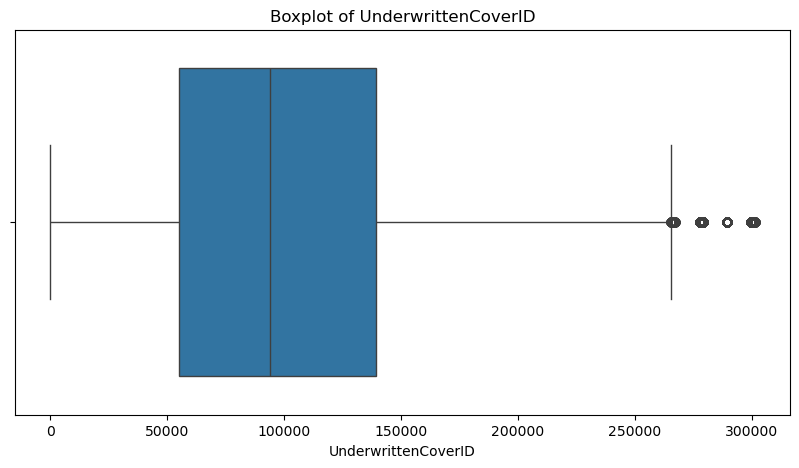

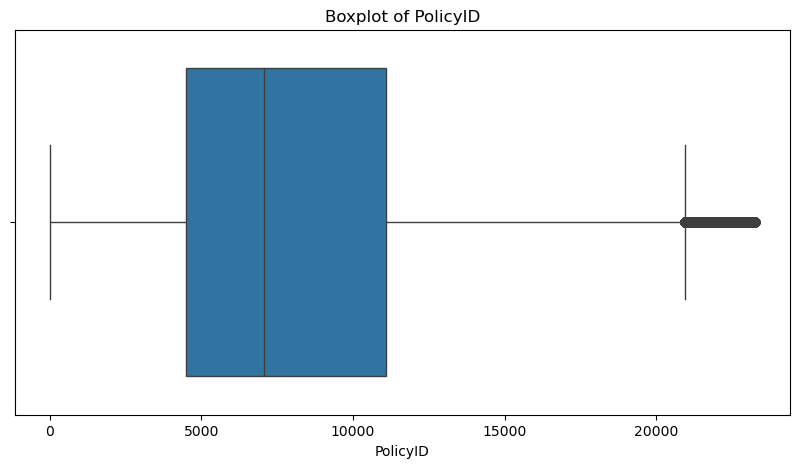

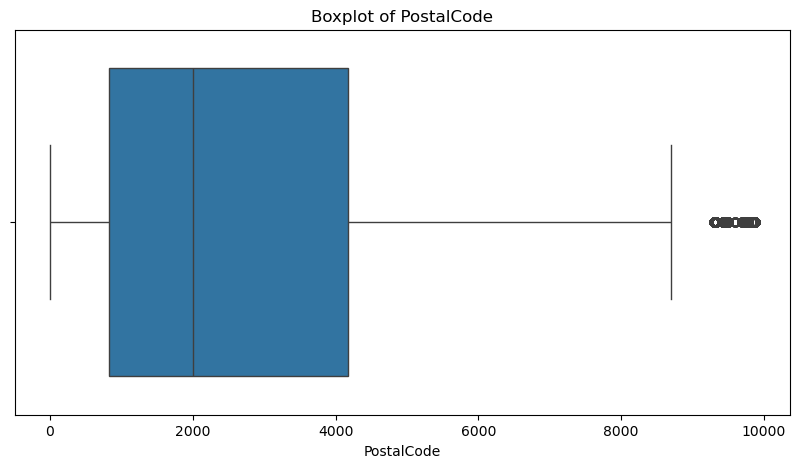

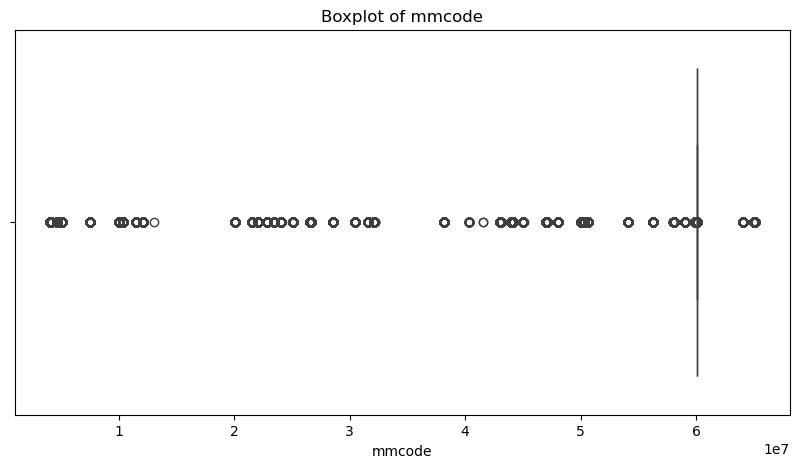

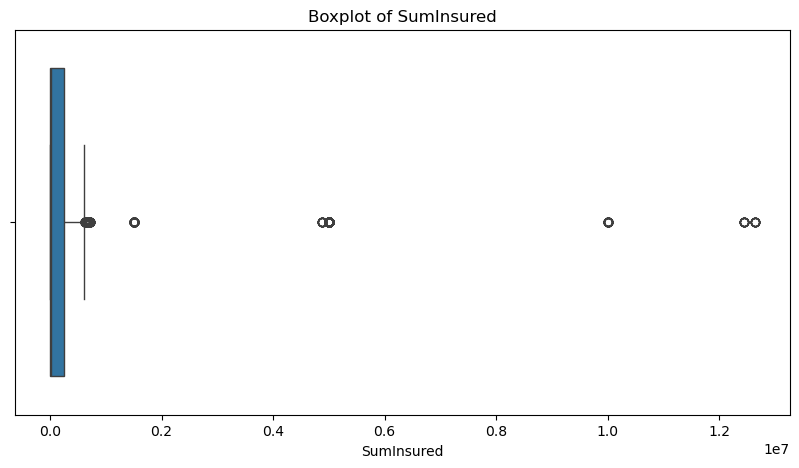

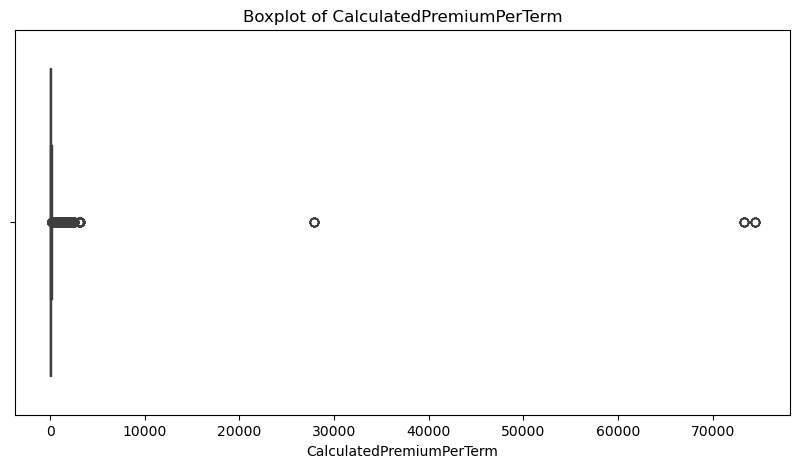

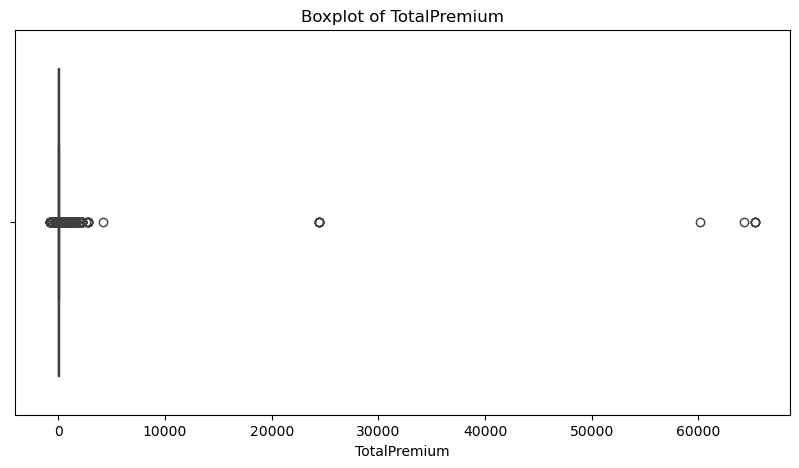

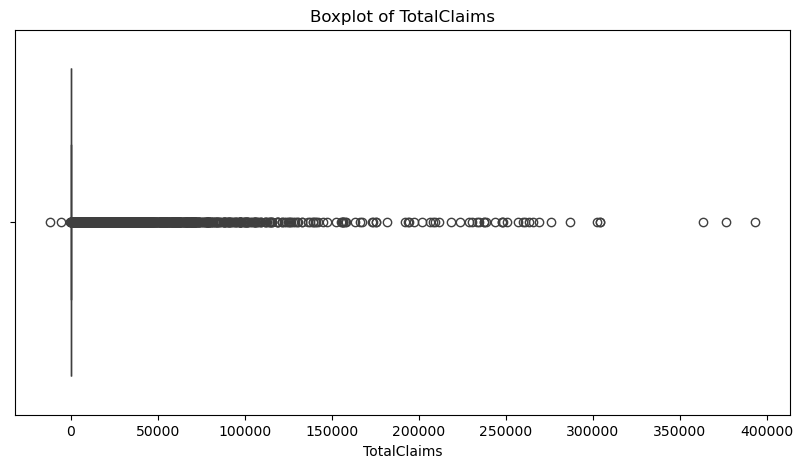

In [29]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [30]:
from scipy import stats
# List of columns to check for outliers
columns_with_outliers = ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'SumInsured', 
                          'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
# Calculate Z-scores
z_scores = stats.zscore(df[columns_with_outliers].select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)  # Rows where all columns are outliers

# Add outlier indicator to dataframe
df['is_outlier'] = outliers
print(f"Number of outlier rows: {df['is_outlier'].sum()}")


Number of outlier rows: 0


In [31]:
#Reapply the IQR method to detect outliers, as it might catch issues that the Z-score method missed.
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_dict[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers_dict

outliers_iqr = detect_outliers_iqr(df, columns_with_outliers)
print("Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")


Outliers detected using IQR method:
UnderwrittenCoverID: 5696 outliers
PolicyID: 31164 outliers
PostalCode: 8149 outliers
mmcode: 241404 outliers
SumInsured: 104239 outliers
CalculatedPremiumPerTerm: 175412 outliers
TotalPremium: 209042 outliers
TotalClaims: 2793 outliers


Handle Outlier Using IRQ

In [32]:
# Function to handle outliers using IQR method
def handle_outliers_iqr(df, columns):
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Only apply to numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap the outliers
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            
    return df

# Function to check for outliers using IQR method
def check_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Only apply to numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_summary[col] = len(outliers)
    
    return outlier_summary

# List of columns with outliers detected using IQR method
columns_with_outliers = ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
                         'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']

# Handle outliers
df = handle_outliers_iqr(df, columns_with_outliers)

# Check for outliers after handling
outliers_after_handling = check_outliers_iqr(df, columns_with_outliers)
print("Outliers detected after handling using IQR method:")
print(outliers_after_handling)

Outliers detected after handling using IQR method:
{'UnderwrittenCoverID': 0, 'PolicyID': 0, 'PostalCode': 0, 'mmcode': 0, 'SumInsured': 0, 'CalculatedPremiumPerTerm': 0, 'TotalPremium': 0, 'TotalClaims': 0}


3.3 Visualization

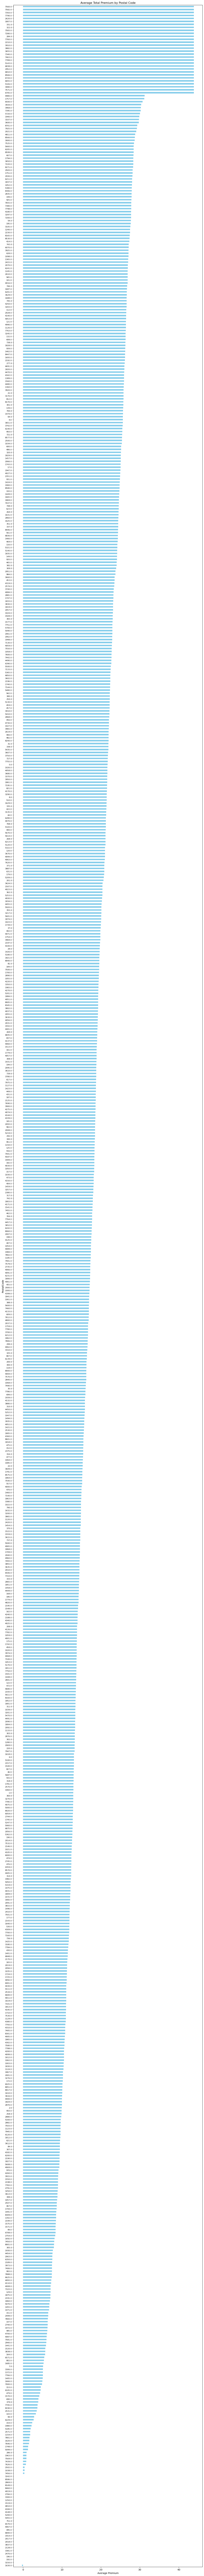

In [33]:
# Group by PostalCode and calculate the mean TotalPremium
premium_by_postalcode = df.groupby('PostalCode')['TotalPremium'].mean().sort_values()

# Create the bar plot with adjusted figure size and font size
plt.figure(figsize=(12, 150))  # Increase height to fit labels
ax = premium_by_postalcode.plot(kind='barh', color='skyblue')

# Titles and labels
plt.title('Average Total Premium by Postal Code')
plt.xlabel('Average Premium')
plt.ylabel('PostalCode')

# Rotate y-axis labels to prevent overlap
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)  # Adjust rotation and font size as needed

plt.tight_layout()  # Ensures everything fits well in the figure
plt.show()


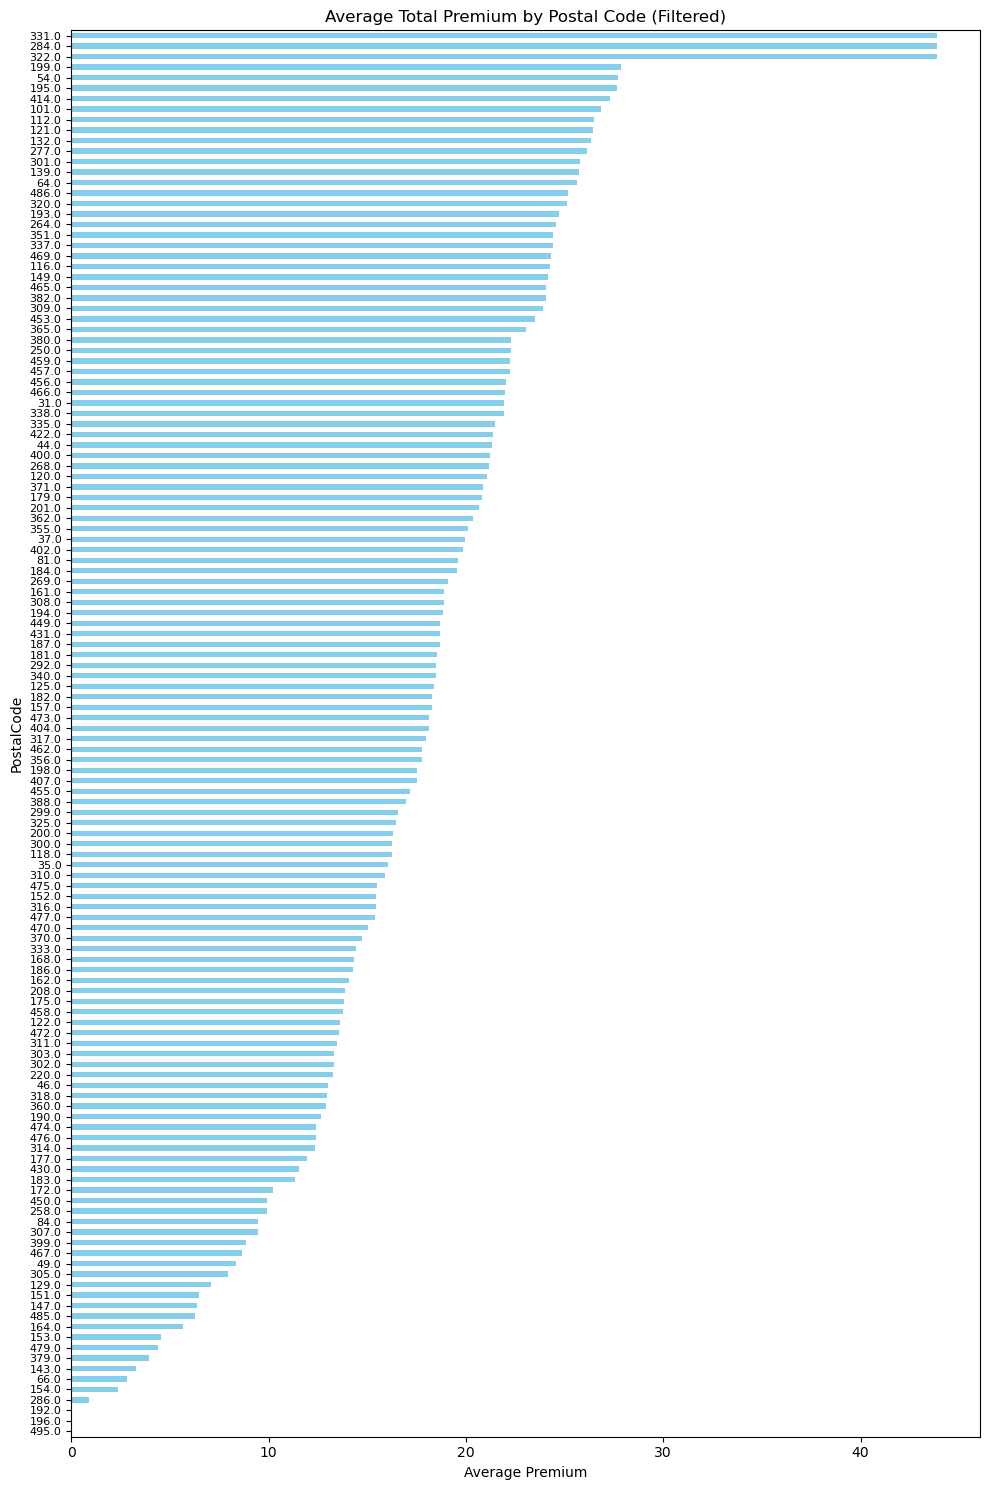

In [34]:
df_filtered = df[(df['PostalCode'] >= 30) & (df['PostalCode'] <= 500)]
premium_by_postalcode = df_filtered.groupby('PostalCode')['TotalPremium'].mean().sort_values()

# Create the bar plot with adjusted figure size and font size
plt.figure(figsize=(10, 15))  # Increase height to fit labels
premium_by_postalcode.plot(kind='barh', color='skyblue')

# Titles and labels
plt.title('Average Total Premium by Postal Code (Filtered)')
plt.xlabel('Average Premium')
plt.ylabel('PostalCode')

# Adjust the font size for y-axis labels
plt.yticks(fontsize=8)  # Reduce font size if needed

plt.tight_layout()  # Ensures everything fits well in the figure
plt.show()

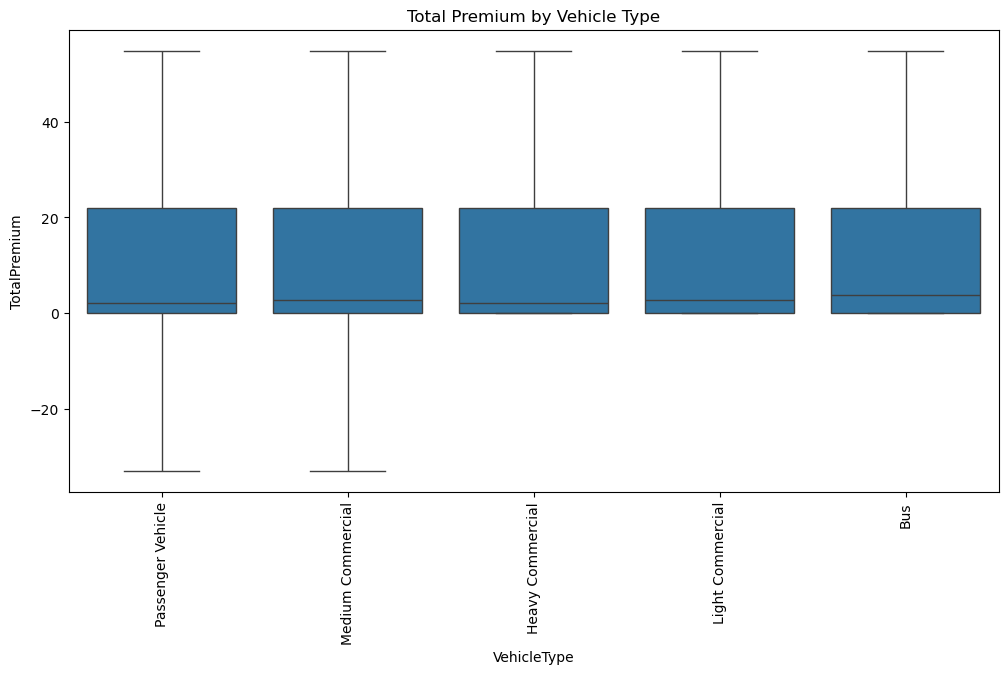

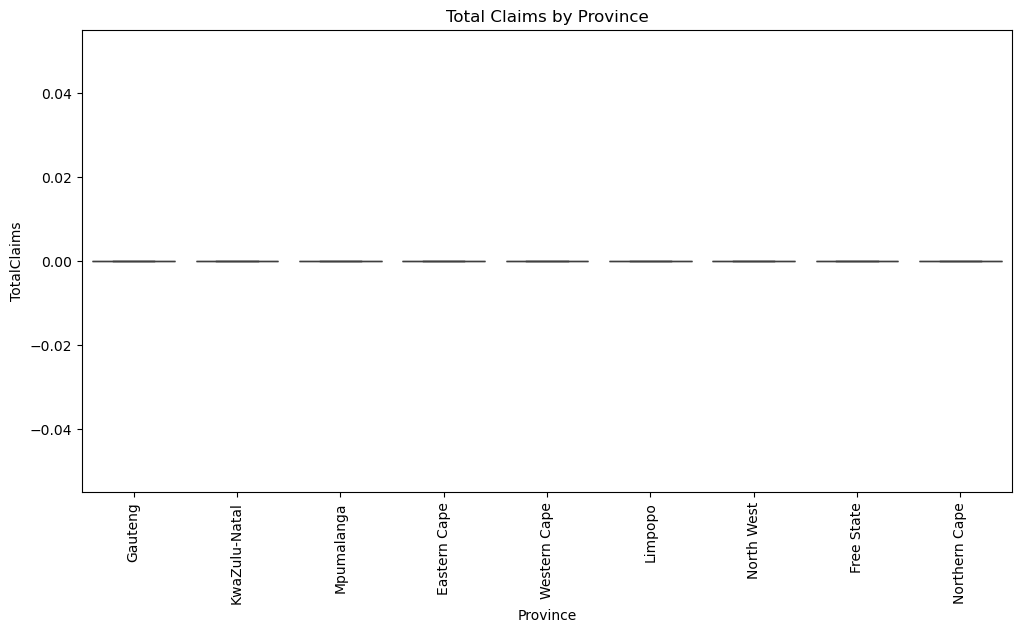

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='VehicleType', y='TotalPremium', data=df)
plt.title('Total Premium by Vehicle Type')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='TotalClaims', data=df)
plt.title('Total Claims by Province')
plt.xticks(rotation=90)
plt.show()


C:\Users\getac\AppData\Local\Temp\ipykernel_18368\1578253962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskCategory', y='TotalPremium', palette='viridis')
C:\Users\getac\AppData\Local\Temp\ipykernel_18368\1578253962.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskCategory', y='TotalClaims', palette='viridis')


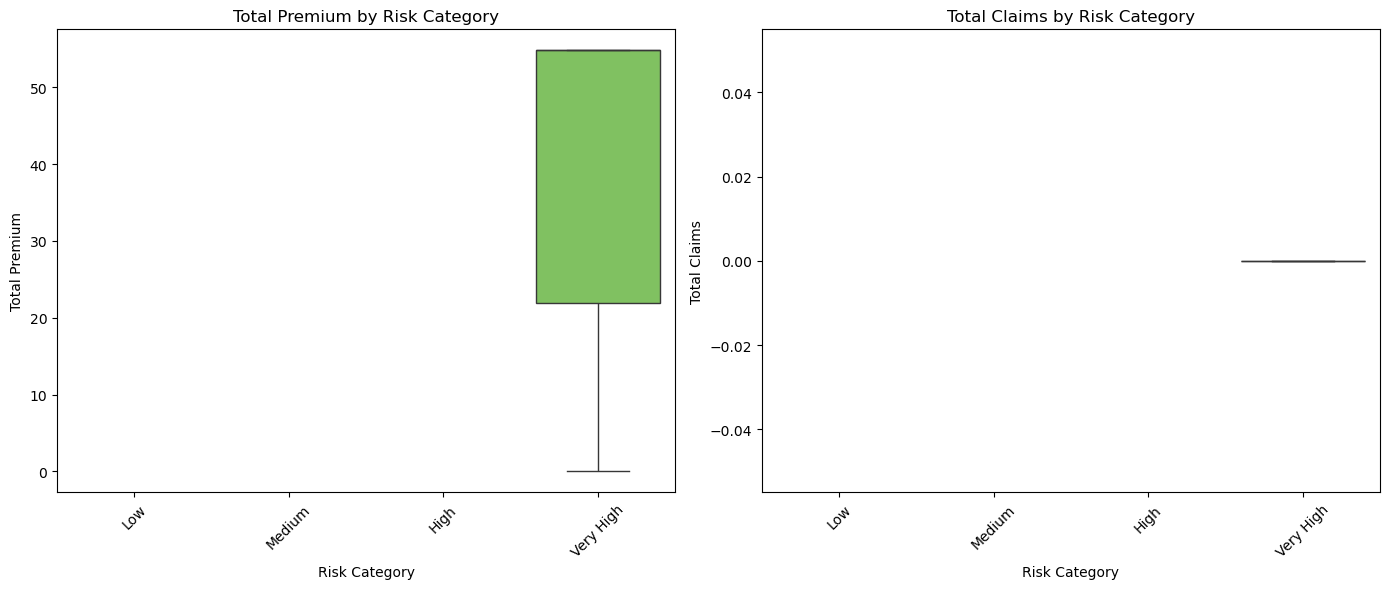

In [36]:
#Premium and Claims by RiskCategory
plt.figure(figsize=(14, 6))

# Boxplot for TotalPremium by RiskCategory
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='RiskCategory', y='TotalPremium', palette='viridis')
plt.title('Total Premium by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)

# Boxplot for TotalClaims by RiskCategory
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='RiskCategory', y='TotalClaims', palette='viridis')
plt.title('Total Claims by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\getac\AppData\Local\Temp\ipykernel_18368\2294268980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CoverCategory', y='TotalPremium', palette='Set2')


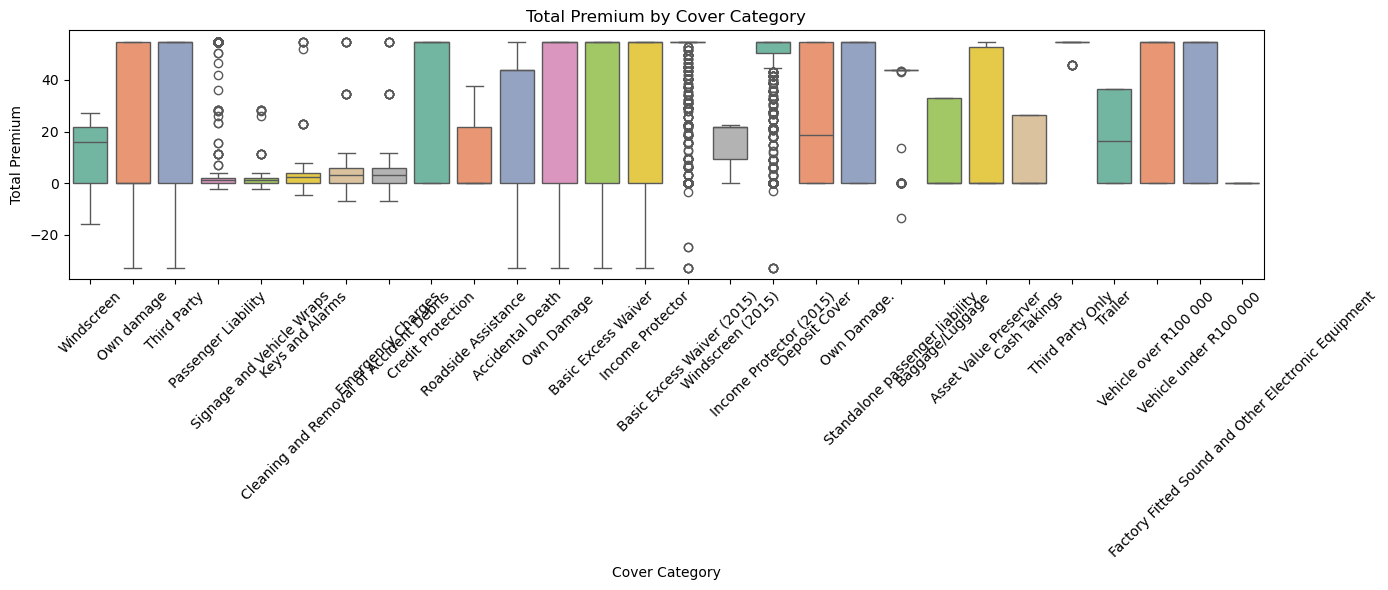

In [38]:
#Premium Distribution by CoverCategory
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='CoverCategory', y='TotalPremium', palette='Set2')
plt.title('Total Premium by Cover Category')
plt.xlabel('Cover Category')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\getac\AppData\Local\Temp\ipykernel_18368\2709875707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='TotalPremium', palette='Pastel1')
C:\Users\getac\AppData\Local\Temp\ipykernel_18368\2709875707.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='TotalClaims', palette='Pastel1')


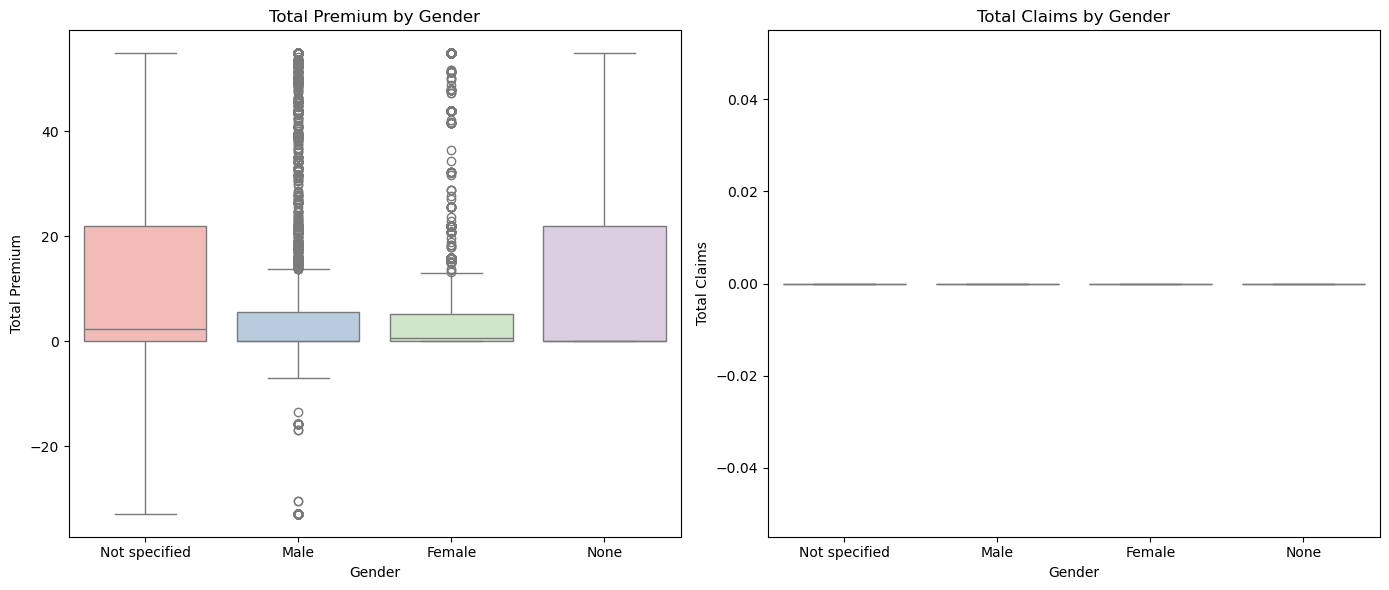

In [40]:
#Premium and Claims by Gender
plt.figure(figsize=(14, 6))

# Boxplot for TotalPremium by Gender
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='TotalPremium', palette='Pastel1')
plt.title('Total Premium by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Premium')

# Boxplot for TotalClaims by Gender
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Gender', y='TotalClaims', palette='Pastel1')
plt.title('Total Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claims')

plt.tight_layout()
plt.show()


C:\Users\getac\AppData\Local\Temp\ipykernel_18368\3155086667.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Province', y='TotalPremium', palette='Set3')
C:\Users\getac\AppData\Local\Temp\ipykernel_18368\3155086667.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Province', y='TotalClaims', palette='Set3')


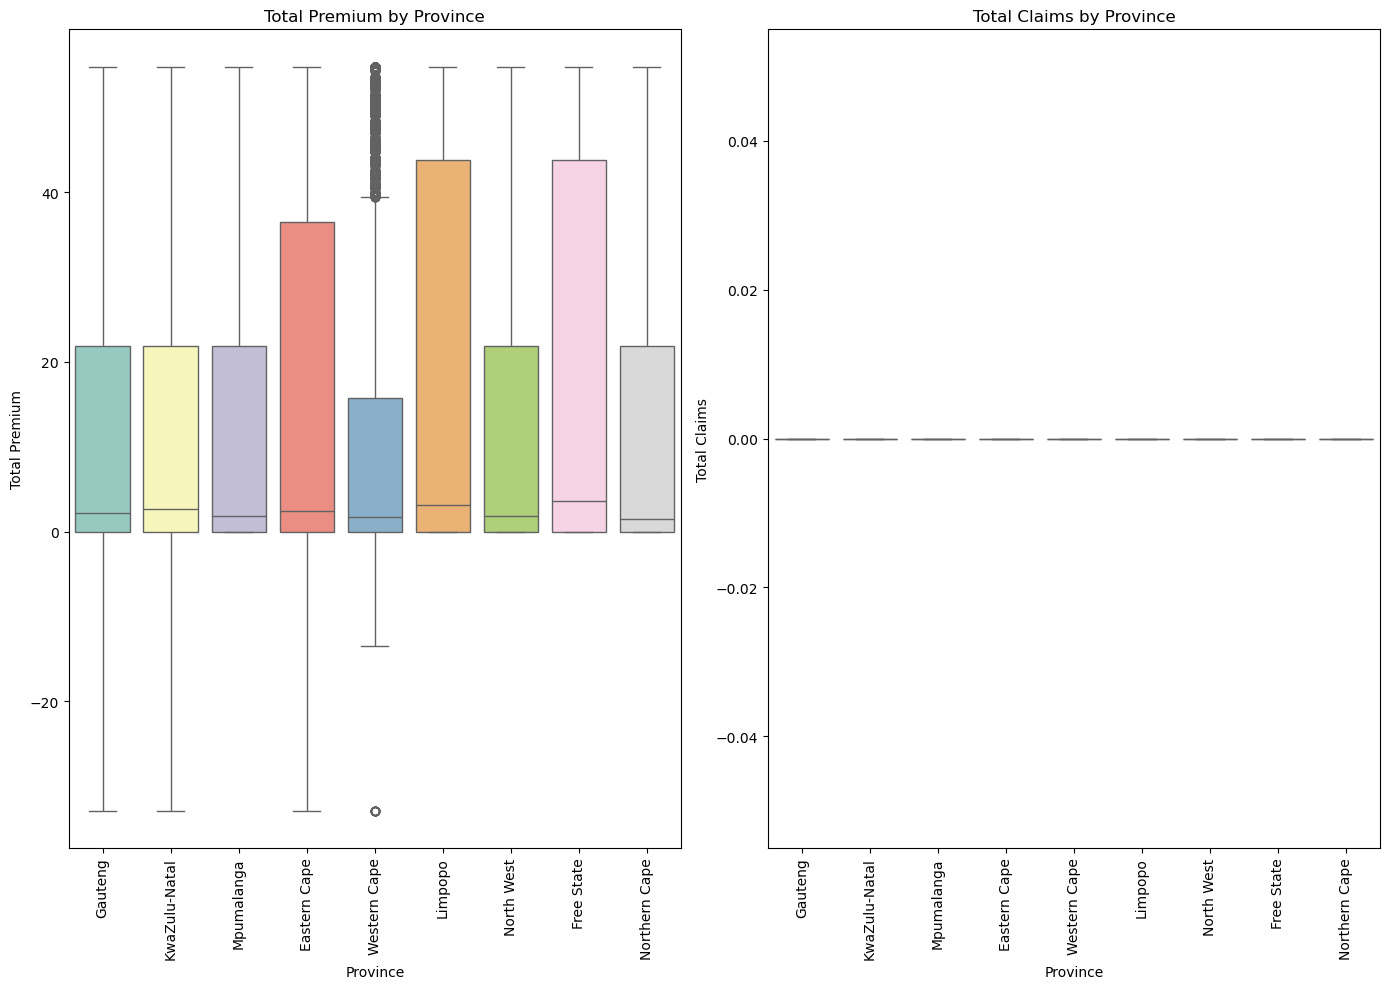

In [41]:
#Premium and Claims by Province
plt.figure(figsize=(14, 10))

# Boxplot for TotalPremium by Province
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Province', y='TotalPremium', palette='Set3')
plt.title('Total Premium by Province')
plt.xlabel('Province')
plt.ylabel('Total Premium')
plt.xticks(rotation=90)

# Boxplot for TotalClaims by Province
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Province', y='TotalClaims', palette='Set3')
plt.title('Total Claims by Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

